In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [2]:
import os
os.chdir('MyDrive/MyDrive/facturedo_test_00')

# I Dataset Loading

## Carga y verificación de tipo de variables y valores nulos

In [38]:
import pandas as pd

In [39]:
df_test = pd.read_csv('test.csv')
df_test_label = pd.read_csv('test_label.csv', header=None)
df_train = pd.read_csv('train.csv')
df_train_label = pd.read_csv('train_label.csv', header=None)
df_test.shape , df_test_label.shape, df_train.shape , df_train_label.shape

((548, 72), (548, 1), (2189, 72), (2189, 1))

In [40]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [41]:
pd.crosstab(df_train_label[0],columns='count')/df_train_label.shape[0]

col_0,count
0,
0.000,0.804
1.000,0.196


In [42]:
pd.crosstab(df_test_label[0],columns='count')/df_test_label.shape[0]

col_0,count
0,
0.000,0.803
1.000,0.197


In [43]:
df_train.describe()

,Unnamed: 0,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,tcs37,tcs38,tcs39,tcs40,tcs41,tcs42,tc43,tc44,tc45,tc46,tc47,tc48,tc49,tc50,tc51,tc52,tc53,dv54,ae55,ae56,ae57,ae58,ae59,ae60,ae61,ae62,ae63,ae64,ae65,ae66,ae67,ae68,d69,d70
count,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000
mean,1457.218,27893.359,2498074.466,87.099,10.318,3.608,73322869.319,10110430.983,11262.683,2283687.466,20.921,672.127,5.630,8800051.642,50.051,82.415,3090.847,713.674,0.591,52240.414,150292.414,10014.789,0.460,1.578,11831653.377,13449884.324,4.414,1003.878,0.418,6.167,27.775,2.038,5.573,15.669,421.937,34.648,35.711,34.119,0.153,0.635,0.136,0.032,0.004,0.021,0.005,0.003,0.010,0.000,0.000,0.011,0.286,0.016,0.654,0.000,0.013,0.275,0.206,0.113,0.131,0.035,0.004,0.006,0.035,0.372,0.004,0.022,0.005,0.015,0.008,0.044,0.122,0.000
std,842.159,277091.982,3713768.961,29.549,25.922,8.478,300925686.482,42093940.057,154044.166,3283374.390,13.120,153.925,1.322,42598076.639,388.629,1058.498,34525.106,6590.563,2.589,482665.062,449897.589,71672.069,2.738,7.472,63410335.155,41332366.272,6.547,2893.458,2.443,24.061,44.799,8.405,22.946,36.359,345.095,37.068,59.697,33.231,0.361,0.482,0.343,0.177,0.060,0.143,0.067,0.052,0.097,0.021,0.021,0.104,0.452,0.127,0.476,0.021,0.112,0.446,0.405,0.316,0.338,0.183,0.064,0.080,0.183,0.483,0.064,0.146,0.067,0.120,0.088,0.206,0.328,0.000
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-3.000,0.000,0.000,0.000,0.000,0.000,0.000,-3.000,-3.000,-3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,731.000,0.000,14119.880,100.000,0.000,0.000,2898816.860,0.000,0.000,0.000,11.000,610.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16292.585,0.000,0.000,35.000,-1.288,0.000,0.000,0.000,0.000,0.000,121.000,30.000,1.000,30.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1453.000,0.000,178100.560,100.000,0.000,0.000,16230241.680,19704.600,0.000,0.000,22.000,699.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,82233.967,646617.050,0.000,325.000,-0.625,0.000,0.000,0.000,0.000,0.000,323.000,31.000,1.000,31.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,2188.000,0.000,3958600.590,100.000,0.000,5.000,33084267.450,2560790.580,0.000,4355600.000,24.000,791.000,6.000,526941.680,0.000,0.000,0.000,85.000,0.000,0.000,105000.000,0.000,0.000,0.000,2867600.603,13218157.600,7.000,675.000,1.389,0.000,100.000,0.000,0.000,0.000,723.000,31.000,62.000,31.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,2907.000,5030245.826,12570777.870,100.000,100.000,183.000,3283312500.

In [44]:
columns = df_train.columns
for column in columns:
  q = len(df_train[column].unique())
  print("{} : {}".format(column,q))

Unnamed: 0 : 2189
v0 : 28
v1 : 1186
v2 : 36
v3 : 38
v4 : 28
v5 : 746
v6 : 485
v7 : 18
v8 : 109
v9 : 62
v10 : 350
v11 : 7
v12 : 268
v13 : 49
v14 : 41
v15 : 94
v16 : 113
v17 : 23
v18 : 86
v19 : 126
v20 : 81
v21 : 22
v22 : 35
v23 : 536
v24 : 346
v25 : 33
v26 : 419
v27 : 800
v28 : 2
v29 : 2
v30 : 42
v31 : 2
v32 : 2
v33 : 458
v34 : 34
v35 : 26
v36 : 29
tcs37 : 2
tcs38 : 2
tcs39 : 2
tcs40 : 2
tcs41 : 2
tcs42 : 2
tc43 : 2
tc44 : 2
tc45 : 2
tc46 : 2
tc47 : 2
tc48 : 2
tc49 : 2
tc50 : 2
tc51 : 2
tc52 : 2
tc53 : 2
dv54 : 2
ae55 : 2
ae56 : 2
ae57 : 2
ae58 : 2
ae59 : 2
ae60 : 2
ae61 : 2
ae62 : 2
ae63 : 2
ae64 : 2
ae65 : 2
ae66 : 2
ae67 : 2
ae68 : 2
d69 : 2
d70 : 1


Por medio de .describe() y .unique() se puede observar que variables son continuas y que variables son categóricas

In [45]:
# detectar valores nulos
df_train.info(), df_train_label.info(), df_test.info(), df_test_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189 entries, 0 to 2188
Data columns (total 72 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2189 non-null   int64  
 1   v0          2189 non-null   float64
 2   v1          2189 non-null   float64
 3   v2          2189 non-null   float64
 4   v3          2189 non-null   float64
 5   v4          2189 non-null   float64
 6   v5          2189 non-null   float64
 7   v6          2189 non-null   float64
 8   v7          2189 non-null   float64
 9   v8          2189 non-null   float64
 10  v9          2189 non-null   float64
 11  v10         2189 non-null   float64
 12  v11         2189 non-null   float64
 13  v12         2189 non-null   float64
 14  v13         2189 non-null   float64
 15  v14         2189 non-null   float64
 16  v15         2189 non-null   float64
 17  v16         2189 non-null   float64
 18  v17         2189 non-null   float64
 19  v18         2189 non-null  

(None, None, None, None)

In [46]:
df_train.isnull().values.any(), df_train_label.isnull().values.any(), df_test.isnull().values.any(), df_test_label.isnull().values.any()

(False, False, False, False)

In [47]:
continuous_vars = ['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8',
 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 
 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 
 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36']
non_continuous_vars = ['tcs37',
       'tcs38', 'tcs39', 'tcs40', 'tcs41', 'tcs42', 'tc43', 'tc44', 'tc45',
       'tc46', 'tc47', 'tc48', 'tc49', 'tc50', 'tc51', 'tc52', 'tc53', 'dv54',
       'ae55', 'ae56', 'ae57', 'ae58', 'ae59', 'ae60', 'ae61', 'ae62', 'ae63',
       'ae64', 'ae65', 'ae66', 'ae67', 'ae68', 'd69', 'd70']

## Detección de multi-colinealidad

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
import scipy
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

### Correlación entre variables numéricas

In [50]:
corr_matrix =  df_train[continuous_vars].corr()

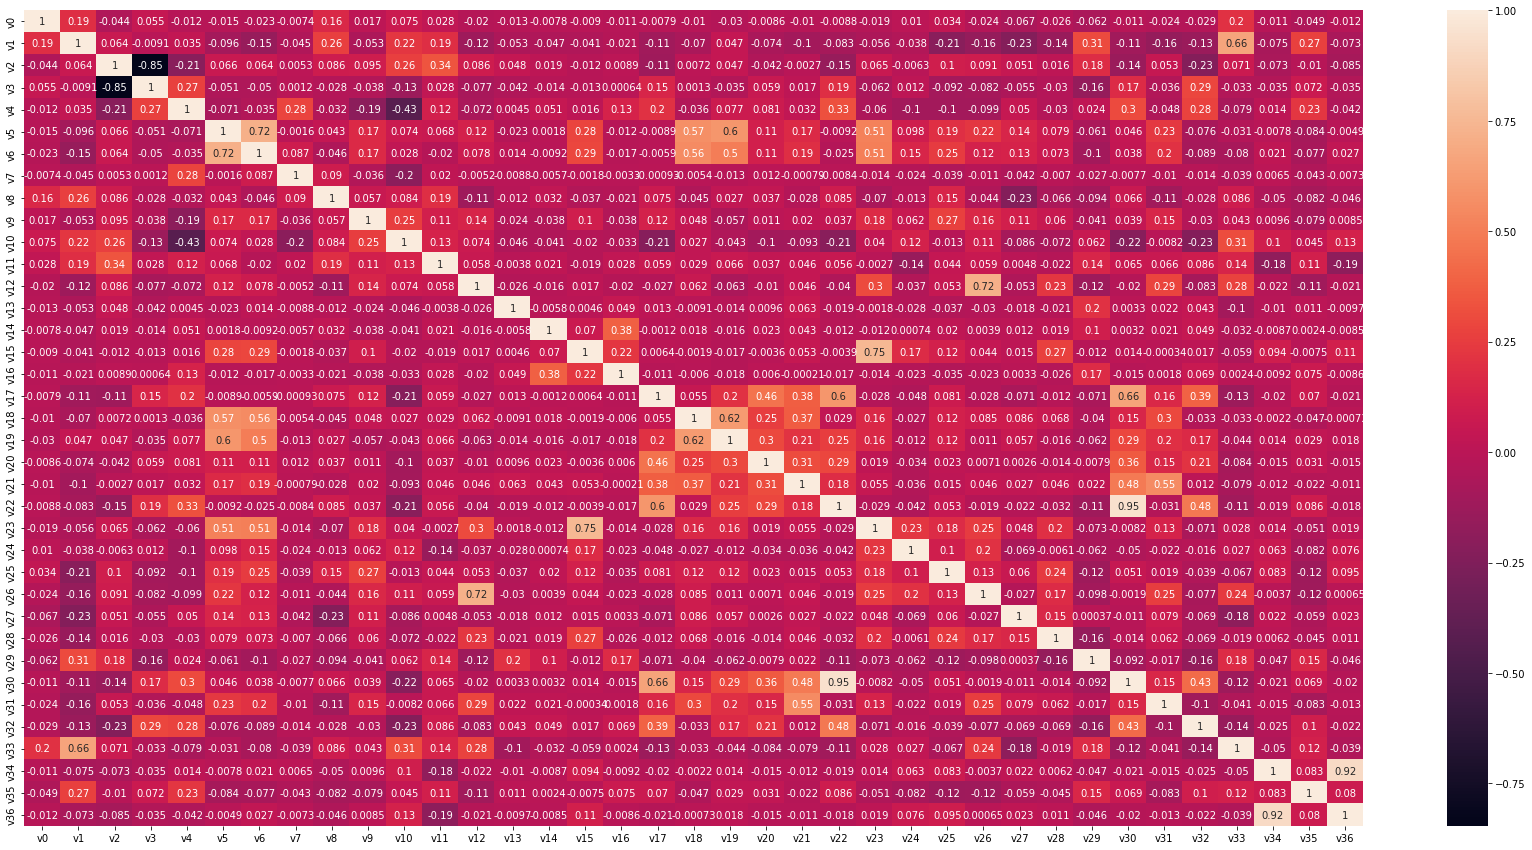

In [51]:
plt.figure(figsize=(30,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [52]:
hcorr_vars = []
k=1
for i in range(corr_matrix.shape[0]):
  for j in range(k,corr_matrix.shape[1]):
    if corr_matrix.iloc[i,j] <= -0.7 or corr_matrix.iloc[i,j] >= 0.7:
      hcorr_vars.append((corr_matrix.columns[i],corr_matrix.index[j]))
    else:
      continue
  k += 1
hcorr_vars

[('v2', 'v3'),
 ('v5', 'v6'),
 ('v12', 'v26'),
 ('v15', 'v23'),
 ('v22', 'v30'),
 ('v34', 'v36')]

In [53]:
vars_to_eliminate = [hcorr_vars[i][1] for i in range(len(hcorr_vars))]
vars_to_eliminate

['v3', 'v6', 'v26', 'v23', 'v30', 'v36']

In [54]:
notcorr_continuous_vars = list(set(continuous_vars).difference(vars_to_eliminate))
notcorr_continuous_vars = sorted(notcorr_continuous_vars)
notcorr_continuous_vars

['v0',
 'v1',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v2',
 'v20',
 'v21',
 'v22',
 'v24',
 'v25',
 'v27',
 'v28',
 'v29',
 'v31',
 'v32',
 'v33',
 'v34',
 'v35',
 'v4',
 'v5',
 'v7',
 'v8',
 'v9']

### Correlación entre variables dummy


#### exploración variables dummy

In [55]:
def dummy_exploration(df_input,dummy_columns,df_output,cat_var):
  
  rows = df_input.shape[0]
  values = df_input[dummy_columns].sum(axis=1).unique()
  #Existen valores que no pertencen a ninguna categoría
  null_values = rows - df_input[dummy_columns].sum(axis=1).sum()
  indexes = df_input[df_train[dummy_columns].sum(axis=1) == 0].index
  exp_table = df_output.iloc[indexes].groupby(0).size()

  print(f'Los  valores que componen la varaible son: {values} ')
  print(f'Cant. de filas con "posibles" valores nulos: {null_values} ') 
  print(f'''Cant. de outputs relacionados a los "posibles" valores nulos: \n {exp_table}''')

  tmp_df = pd.DataFrame(df_input[dummy_columns].stack())
  tmp_df = tmp_df.where(tmp_df[0] == 1 ).dropna()

  for i in indexes:
    tmp_df.loc[(i,'del_cat'),:] = 1

  tmp_df = tmp_df.reset_index(level=1).sort_index(axis=0, ascending=True, inplace=False).drop(columns=[0], axis=1).rename(columns={'level_1' : cat_var})
  print(f'Dimensiones del dataframe resultante: {tmp_df.shape}')

  return tmp_df

In [56]:
indexes_tcs = dummy_exploration(df_train,['tcs37','tcs38', 'tcs39', 'tcs40', 'tcs41', 'tcs42'],df_train_label,'tcs')

Los  valores que componen la varaible son: [1 0] 
Cant. de filas con "posibles" valores nulos: 42 
Cant. de outputs relacionados a los "posibles" valores nulos: 
 0
0.000    38
1.000     4
dtype: int64
Dimensiones del dataframe resultante: (2189, 1)


In [57]:
_ = dummy_exploration(df_test,['tcs37','tcs38', 'tcs39', 'tcs40', 'tcs41', 'tcs42'],df_test_label,'tcs')

Los  valores que componen la varaible son: [1 0] 
Cant. de filas con "posibles" valores nulos: 6 
Cant. de outputs relacionados a los "posibles" valores nulos: 
 0
0.000    5
1.000    5
dtype: int64
Dimensiones del dataframe resultante: (552, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [58]:
indexes_tc = dummy_exploration(df_train,['tc43', 'tc44', 'tc45','tc46', 'tc47', 'tc48', 'tc49', 'tc50', 'tc51', 'tc52', 'tc53'],df_train_label,'tc')

Los  valores que componen la varaible son: [1 0] 
Cant. de filas con "posibles" valores nulos: 4 
Cant. de outputs relacionados a los "posibles" valores nulos: 
 0
0.000    4
dtype: int64
Dimensiones del dataframe resultante: (2189, 1)


In [59]:
_ = dummy_exploration(df_test,['tc43', 'tc44', 'tc45','tc46', 'tc47', 'tc48', 'tc49', 'tc50', 'tc51', 'tc52', 'tc53'],df_test_label,'tc')

Los  valores que componen la varaible son: [1 0] 
Cant. de filas con "posibles" valores nulos: 2 
Cant. de outputs relacionados a los "posibles" valores nulos: 
 0
1.000    2
dtype: int64
Dimensiones del dataframe resultante: (548, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [60]:
df_train[['dv54']].sum(axis=1).unique()

array([0, 1])

In [61]:
#Nº de ceros
df_train.shape[0] - df_train[['dv54']].sum(axis=1).sum()

1588

In [62]:
indexes_ae = dummy_exploration(df_train,['ae55', 'ae56', 'ae57', 'ae58', 'ae59', 'ae60', 'ae61', 'ae62', 'ae63',
       'ae64', 'ae65', 'ae66', 'ae67', 'ae68'],df_train_label,'ae')

Los  valores que componen la varaible son: [1 0] 
Cant. de filas con "posibles" valores nulos: 1 
Cant. de outputs relacionados a los "posibles" valores nulos: 
 0
0.000    1
dtype: int64
Dimensiones del dataframe resultante: (2189, 1)


In [63]:
_ = dummy_exploration(df_test,['ae55', 'ae56', 'ae57', 'ae58', 'ae59', 'ae60', 'ae61', 'ae62', 'ae63',
       'ae64', 'ae65', 'ae66', 'ae67', 'ae68'],df_test_label,'ae')

Los  valores que componen la varaible son: [1] 
Cant. de filas con "posibles" valores nulos: 0 
Cant. de outputs relacionados a los "posibles" valores nulos: 
 Series([], dtype: int64)
Dimensiones del dataframe resultante: (548, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [64]:
df_train[['d69']].sum(axis=1).unique()

array([0, 1])

In [65]:
#Nº de ceros
df_train.shape[0] - df_train[['d69']].sum(axis=1).sum()

1921

In [66]:
df_train[['d70']].sum(axis=1).unique()

array([0])

In [67]:
#Nº de ceros
df_train.shape[0] - df_train[['d70']].sum(axis=1).sum()

2189

In [68]:
cat_df = pd.concat([indexes_tcs,indexes_tc,df_train['dv54'],indexes_ae,df_train['d69'],df_train['d70']],axis=1)

In [69]:
#Contar composición de la variable categorica
indexes_tc.groupby(by='tc').size()

tc
del_cat       4
tc43         10
tc44          6
tc45         21
tc46          1
tc47          1
tc48         24
tc49        626
tc50         36
tc51       1431
tc52          1
tc53         28
dtype: int64

#### Buscando correlaciones
<p>
Coeficiente de correlación de spearman

>* mayor a 0.7 o menor a -0.7 es una correlación fuerte
</p>
<p>
<br>X<sup>2</sup>  tables test for independence<br>

>* H0: p > 0.05 vars are independent<br>
* H1: p < 0.05 vars are correlated<br>
</p>

In [70]:
def spearman_test(df_input,vars):
  # Spearman correlation coefficients, aplica para variables ordinales
  high_scorr = []
  for i,ncv_1 in enumerate(vars):
    for ncv_2 in vars[i+1:]:
      spearmanr_coeff, p_value = spearmanr(df_input[ncv_1],df_input[ncv_2])
      #print(spearmanr_coeff, ncv_1, ncv_2)
      #print('='*12)
      if spearmanr_coeff <= -0.7 or spearmanr_coeff >= 0.7:
        high_scorr.append((ncv_1,ncv_2))
  return high_scorr

In [71]:
def chi_squared_test(df_input,vars):
  
  chi2_corr = []
  for i,ncv_1 in enumerate(vars):
    for ncv_2 in vars[i+1:]:
      table = pd.crosstab(df_input[ncv_1],df_input[ncv_2])
      chi2, p, dof, expected = chi2_contingency(table.values)
      if p <= 0.05:
        chi2_corr.append((ncv_1,ncv_2))
      else:
        continue
  
  return chi2_corr

In [72]:
corr_catvars = chi_squared_test(cat_df,cat_df.columns)
corr_catvars #aparentemente todas están corelacionadas => se procederá a modelar usando sólo una de las categorías

[('tcs', 'tc'),
 ('tcs', 'dv54'),
 ('tcs', 'ae'),
 ('tcs', 'd69'),
 ('tc', 'dv54'),
 ('tc', 'ae'),
 ('tc', 'd69'),
 ('dv54', 'ae'),
 ('dv54', 'd69'),
 ('ae', 'd69')]

# II Data Treatment

In [73]:
X_train = df_train[notcorr_continuous_vars+['ae55', 'ae56', 'ae57', 'ae58', 'ae59', 'ae60', 'ae61', 'ae62', 'ae63',
       'ae64', 'ae65', 'ae66', 'ae67', 'ae68']]
X_train.head()

,v0,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v24,v25,v27,v28,v29,v31,v32,v33,v34,v35,v4,v5,v7,v8,v9,ae55,ae56,ae57,ae58,ae59,ae60,ae61,ae62,ae63,ae64,ae65,ae66,ae67,ae68
0,0.000,143270.100,643.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,15266089.960,8.000,-0.634,0.000,0.000,0.000,0.000,132,31.000,1.000,0.000,63090564.440,0.000,6240000.000,17.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0.000,1403461.970,475.000,6.000,5700426.250,0.000,0.000,20223.000,0.000,2.000,62781.080,0.000,90.000,62781.080,2.000,0.000,0.000,4.000,6.700,100.000,0.000,100.000,0.000,228,31.000,1.000,29.000,8013913.780,44951.900,0.000,12.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19800.240,63401.410,634.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,0.000,0.000,-0.504,0.000,0.000,0.000,0.000,64,31.000,1.000,0.000,323384.600,0.000,0.000,4.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0.000,10585032.220,649.000,6.000,3219970.310,0.000,0.000,0.000,0.000,0.000,0.000,604199.980,100.000,0.000,0.000,0.000,2559635.980,8.000,-1.970,0.000,0.000,0.000,0.000,720,31.000,1.000,5.000,29596681.950,0.000,4500000.000,11.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.000,11259663.090,795.000,6.000,247181.790,0.000,0.000,848.000,848.000,0.000,0.000,0.000,78.000,0.000,0.000,0.000,16134256.080,0.000,-1.288,0.000,100.000,0.000,0.000,968,31.000,1.000,0.000,33626595.710,0.000,3972827.700,24.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## WoE

=> df_train_woe_redcont, df_test_woe_redcont, df_train_woe_red, df_test_woe_red

In [74]:
import math
import numpy as np

In [75]:
#Función para el calculo del WOE y el IV en las variables continuas
def calc_woe_and_iv(df_X,df_Y,var_name,bins=20):
  '''
  df_Y es el dataframe que contiene el target
  '''

  print('El 5% de las observaciones que debe cumplir cada intervalo es: {}, para {} con {} rangos'.format(0.05*df_X.shape[0],var_name,bins))

  outputs_list = [v[0] for v in df_Y.astype(int).values]
  new_df = pd.DataFrame({var_name : df_X[var_name].values , "output" : outputs_list })

  if (new_df[var_name].dtype.kind in 'bifc') and (len(np.unique(new_df[var_name]))>10):
    new_df['ranks'] = pd.qcut(df_train[var_name], bins,  duplicates='drop')
    df_woe = pd. crosstab(new_df['ranks'],new_df['output'])
  else:
    df_woe = pd. crosstab(new_df[var_name],new_df['output'])

  df_woe['total_N'] = df_woe.sum(axis=1)
  n_0 = df_woe[0].sum()
  n_1 = df_woe[1].sum()

  df_woe['porc_bad'] = df_woe[[0]].apply(lambda x: x/n_0 ,axis=1)
  df_woe['porc_good'] = df_woe[[1]].apply(lambda x: x/n_1 ,axis=1)
  df_woe['woe'] = df_woe[['porc_bad','porc_good']].apply(lambda x: math.log(x[1]/x[0]) ,axis=1)
  df_woe['iv'] = df_woe[['porc_bad','porc_good','woe']].apply(lambda x: (x[1]-x[0])*x[2] ,axis=1)

  tmp_df_1 = pd.DataFrame()
  if (len(np.unique(df_X[var_name]))>10):
    tmp_df_1['interval'] = df_woe.index
    tmp_df_1['int_left'] = tmp_df_1['interval'].map(lambda x: x.left)

    plt.figure(figsize=(20,4))
    plt.plot(tmp_df_1.int_left.astype('float'),df_woe.woe, marker='o', linestyle='--', color='r')
    plt.show()
  else:
    plt.figure(figsize=(20,4))
    plt.plot(df_woe.index,df_woe.woe, marker='o', linestyle='--', color='r')
    plt.show()
  
  iv_score = df_woe['iv'].sum()
  print('El "IV score" es = {}'.format(iv_score))

  return df_woe, iv_score

### Visualización por cada *variable*
Se observa el comportamiento de las variables para definir el número de "bins" a usar en cada una.
Aunque no cumplan "monotonicidad" permiten identificar en que rangos de datos hay mayor probabilidad de encontrar un cliente moroso o no

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v0 con 50 rangos


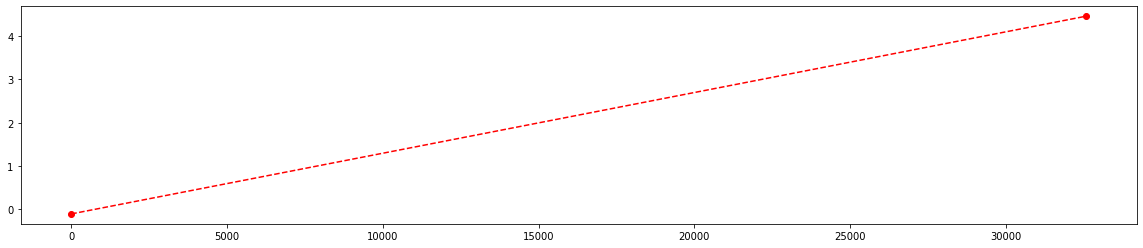

El "IV score" es = 0.4410611026217843


(output                      0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                        
 (-0.001, 32570.69]       1758  387     2145     0.999      0.902 -0.102 0.010
 (32570.69, 5030245.826]     2   42       44     0.001      0.098  4.456 0.431,
 0.4410611026217843)

In [76]:
calc_woe_and_iv(df_train,df_train_label,'v0',50)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v1 con 10 rangos


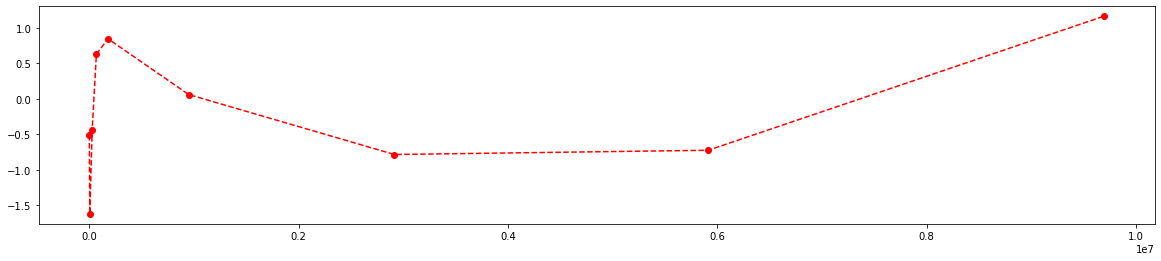

El "IV score" es = 0.6198777964580664


(output                        0   1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                         
 (-0.001, 4460.5]            383  56      439     0.218      0.131 -0.511 0.045
 (4460.5, 27509.61]          208  10      218     0.118      0.023 -1.623 0.154
 (27509.61, 67584.01]        191  30      221     0.109      0.070 -0.439 0.017
 (67584.01, 178100.56]       149  68      217     0.085      0.159  0.627 0.046
 (178100.56, 950247.198]     139  79      218     0.079      0.184  0.847 0.089
 (950247.198, 2915673.476]   174  45      219     0.099      0.105  0.059 0.000
 (2915673.476, 5914389.51]   198  22      220     0.113      0.051 -0.786 0.048
 (5914389.51, 9694103.754]   195  23      218     0.111      0.054 -0.726 0.042
 (9694103.754, 12570777.87]  123  96      219     0.070      0.224  1.164 0.179,
 0.6198777964580664)

In [77]:
calc_woe_and_iv(df_train,df_train_label,'v1',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v2 con 20 rangos


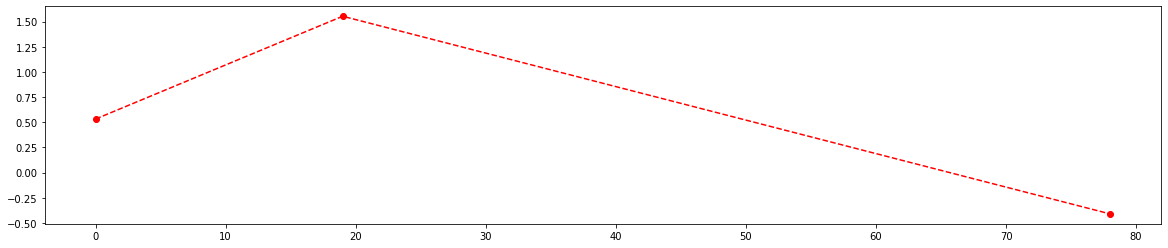

El "IV score" es = 0.49649929937901444


(output             0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                               
 (-0.001, 19.0]   159   66      225     0.090      0.154  0.532 0.034
 (19.0, 78.0]     105  121      226     0.060      0.282  1.553 0.345
 (78.0, 100.0]   1496  242     1738     0.850      0.564 -0.410 0.117,
 0.49649929937901444)

In [78]:
calc_woe_and_iv(df_train,df_train_label,'v2',20)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v3 con 10 rangos


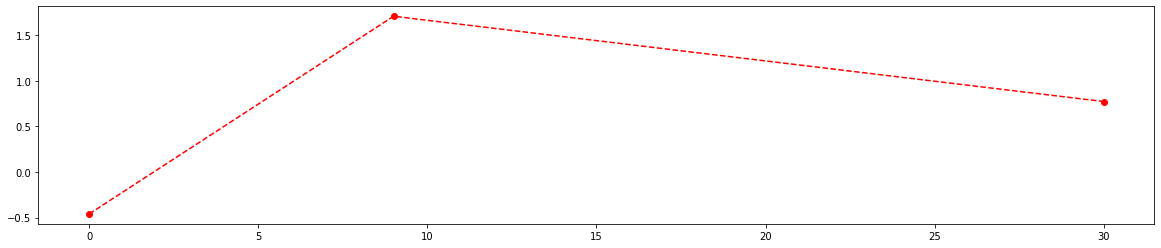

El "IV score" es = 0.6204585923582087


(output            0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                              
 (-0.001, 9.0]  1540  237     1777     0.875      0.552 -0.460 0.148
 (9.0, 30.0]      93  125      218     0.053      0.291  1.707 0.407
 (30.0, 100.0]   127   67      194     0.072      0.156  0.772 0.065,
 0.6204585923582087)

In [79]:
calc_woe_and_iv(df_train,df_train_label,'v3',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v4 con 10 rangos


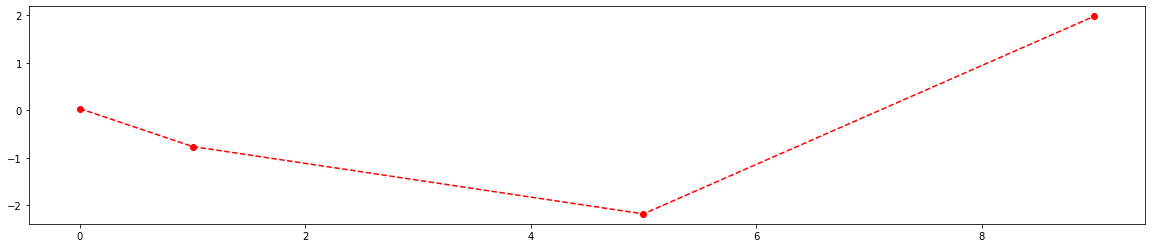

El "IV score" es = 0.8104760416735252


(output            0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                              
 (-0.001, 1.0]  1063  268     1331     0.604      0.625  0.034 0.001
 (1.0, 5.0]      379   43      422     0.215      0.100 -0.765 0.088
 (5.0, 9.0]      255    7      262     0.145      0.016 -2.184 0.281
 (9.0, 183.0]     63  111      174     0.036      0.259  1.978 0.441,
 0.8104760416735252)

In [80]:
calc_woe_and_iv(df_train,df_train_label,'v4',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v5 con 10 rangos


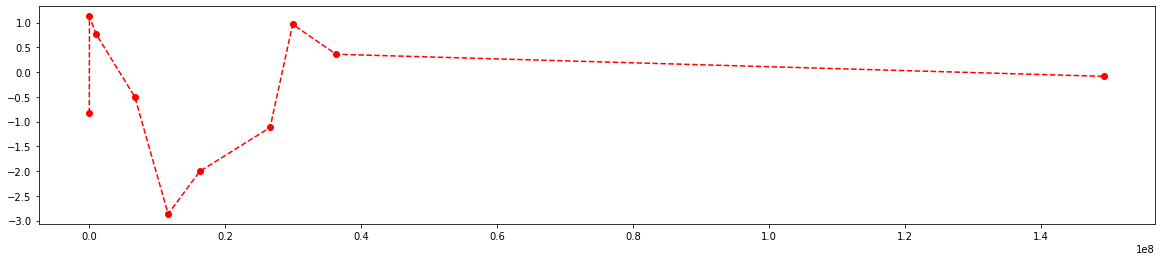

El "IV score" es = 1.0856023450802923


(output                           0   1  total_N  ...  porc_good    woe    iv
 ranks                                            ...                        
 (-0.001, 24283.438]            198  21      219  ...      0.049 -0.832 0.053
 (24283.438, 969808.192]        125  94      219  ...      0.219  1.127 0.167
 (969808.192, 6695220.26]       144  76      220  ...      0.177  0.773 0.074
 (6695220.26, 11597412.738]     190  28      218  ...      0.065 -0.503 0.021
 (11597412.738, 16230241.68]    216   3      219  ...      0.007 -2.865 0.332
 (16230241.68, 26593973.98]     214   7      221  ...      0.016 -2.008 0.211
 (26593973.98, 29915184.24]     201  16      217  ...      0.037 -1.119 0.086
 (29915184.24, 36292514.51]     144  92      236  ...      0.214  0.964 0.128
 (36292514.51, 149234999.586]   149  52      201  ...      0.121  0.359 0.013
 (149234999.586, 3283312500.0]  179  40      219  ...      0.093 -0.087 0.001
 
 [10 rows x 7 columns], 1.0856023450802923)

In [81]:
calc_woe_and_iv(df_train,df_train_label,'v5',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v6 con 10 rangos


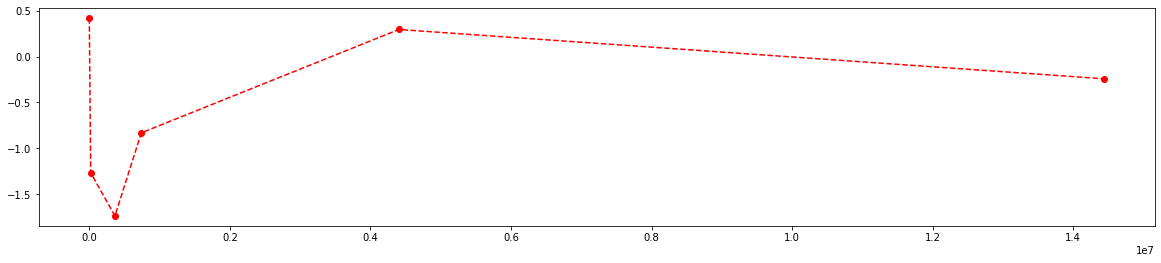

El "IV score" es = 0.4425238869535364


(output                         0    1  total_N  ...  porc_good    woe    iv
 ranks                                           ...                        
 (-0.001, 19704.6]            800  296     1096  ...      0.690  0.417 0.098
 (19704.6, 364900.0]          204   14      218  ...      0.033 -1.267 0.106
 (364900.0, 740338.2]         210    9      219  ...      0.021 -1.738 0.171
 (740338.2, 4405700.0]        198   21      219  ...      0.049 -0.832 0.053
 (4405700.0, 14436422.12]     165   54      219  ...      0.126  0.295 0.009
 (14436422.12, 441531393.46]  183   35      218  ...      0.082 -0.243 0.005
 
 [6 rows x 7 columns], 0.4425238869535364)

In [82]:
calc_woe_and_iv(df_train,df_train_label,'v6',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v7 con 200 rangos


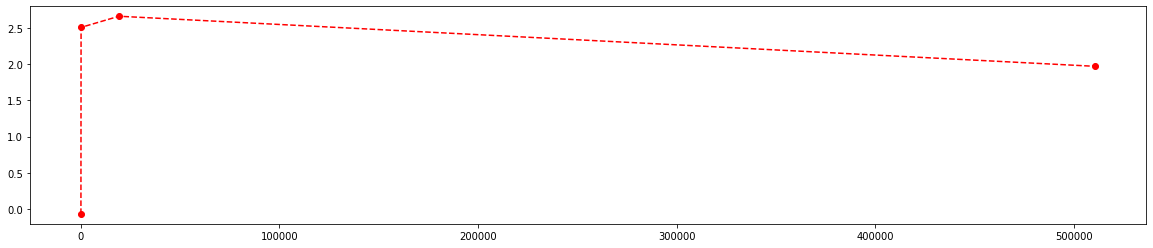

El "IV score" es = 0.16968816670039838


(output                       0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                         
 (-0.001, 74.599]          1748  397     2145     0.993      0.925 -0.071 0.005
 (74.599, 19156.47]           6   18       24     0.003      0.042  2.510 0.097
 (19156.47, 510930.344]       2    7        9     0.001      0.016  2.664 0.040
 (510930.344, 2427616.87]     4    7       11     0.002      0.016  1.971 0.028,
 0.16968816670039838)

In [83]:
calc_woe_and_iv(df_train,df_train_label,'v7',200)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v8 con 19 rangos


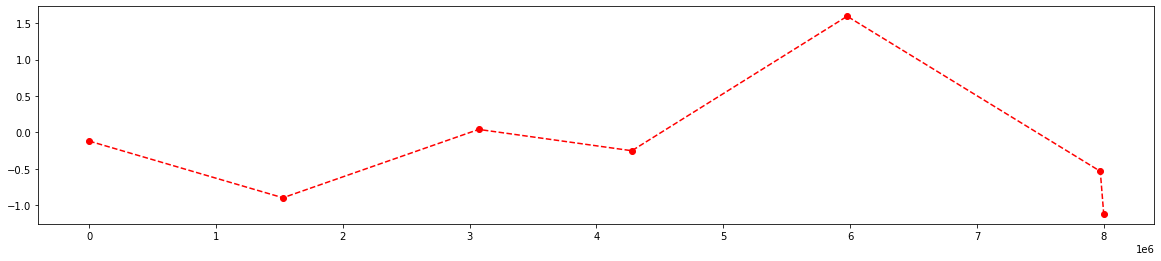

El "IV score" es = 0.42789850274585267


(output                      0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                        
 (-0.001, 1527834.71]     1137  246     1383     0.646      0.573 -0.119 0.009
 (1527834.71, 3071719.0]   141   14      155     0.080      0.033 -0.898 0.043
 (3071719.0, 4279059.0]     63   16       79     0.036      0.037  0.041 0.000
 (4279059.0, 5977000.0]     95   18      113     0.054      0.042 -0.252 0.003
 (5977000.0, 7972827.7]     89  107      196     0.051      0.249  1.596 0.317
 (7972827.7, 8000000.0]    147   21      168     0.084      0.049 -0.534 0.018
 (8000000.0, 10000000.0]    88    7       95     0.050      0.016 -1.120 0.038,
 0.42789850274585267)

In [84]:
calc_woe_and_iv(df_train,df_train_label,'v8',19)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v9 con 10 rangos


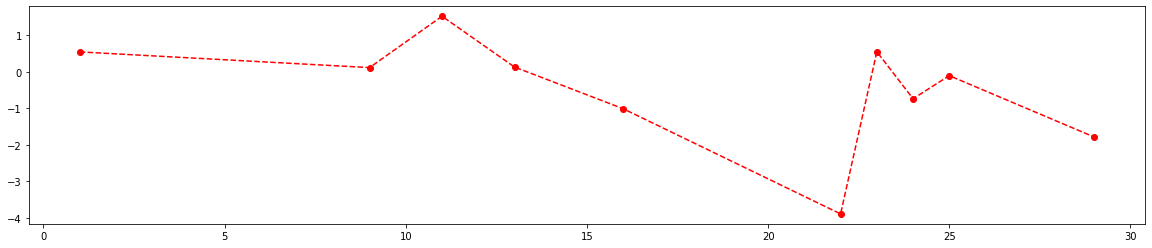

El "IV score" es = 0.8908376564483325


(output           0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                             
 (0.999, 9.0]   186   78      264     0.106      0.182  0.543 0.041
 (9.0, 11.0]    264   72      336     0.150      0.168  0.112 0.002
 (11.0, 13.0]    35   39       74     0.020      0.091  1.520 0.108
 (13.0, 16.0]   166   46      212     0.094      0.107  0.128 0.002
 (16.0, 22.0]   215   19      234     0.122      0.044 -1.015 0.079
 (22.0, 23.0]   202    1      203     0.115      0.002 -3.897 0.438
 (23.0, 24.0]   285  120      405     0.162      0.280  0.547 0.064
 (24.0, 25.0]    43    5       48     0.024      0.012 -0.740 0.009
 (25.0, 29.0]   192   42      234     0.109      0.098 -0.108 0.001
 (29.0, 115.0]  172    7      179     0.098      0.016 -1.790 0.146,
 0.8908376564483325)

In [85]:
calc_woe_and_iv(df_train,df_train_label,'v9',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v10 con 10 rangos


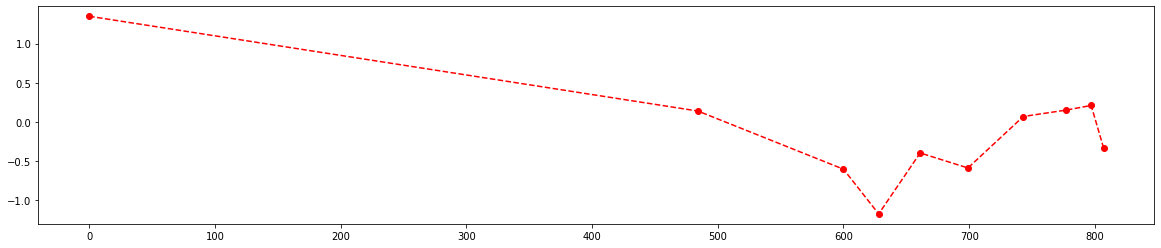

El "IV score" es = 0.4302410954839192


(output             0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                               
 (-0.001, 484.2]  113  106      219     0.064      0.247  1.348 0.246
 (484.2, 600.0]   175   49      224     0.099      0.114  0.139 0.002
 (600.0, 628.0]   195   26      221     0.111      0.061 -0.603 0.030
 (628.0, 661.0]   199   15      214     0.113      0.035 -1.174 0.092
 (661.0, 699.0]   189   31      220     0.107      0.072 -0.396 0.014
 (699.0, 743.0]   192   26      218     0.109      0.061 -0.588 0.028
 (743.0, 777.0]   180   47      227     0.102      0.110  0.069 0.001
 (777.0, 797.0]   180   51      231     0.102      0.119  0.150 0.002
 (797.0, 807.0]   153   46      199     0.087      0.107  0.210 0.004
 (807.0, 936.0]   184   32      216     0.105      0.075 -0.338 0.010,
 0.4302410954839192)

In [86]:
calc_woe_and_iv(df_train,df_train_label,'v10',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v11 con 10 rangos


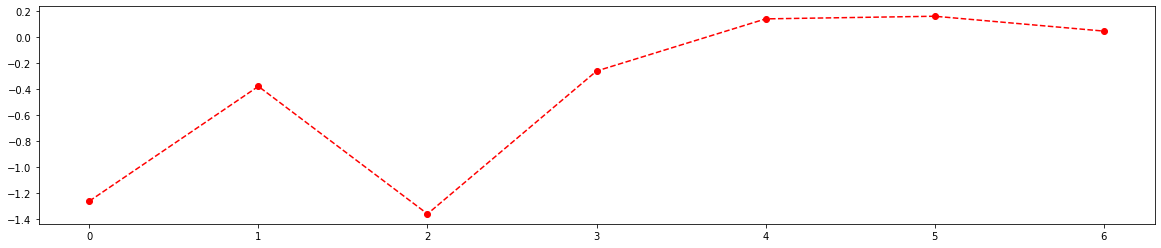

El "IV score" es = 0.057370937332350144


(output     0    1  total_N  porc_bad  porc_good    woe    iv
 v11                                                         
 0.000     87    6       93     0.049      0.014 -1.263 0.045
 1.000      6    1        7     0.003      0.002 -0.380 0.000
 2.000     16    1       17     0.009      0.002 -1.361 0.009
 3.000     16    3       19     0.009      0.007 -0.262 0.001
 4.000     25    7       32     0.014      0.016  0.139 0.000
 5.000     21    6       27     0.012      0.014  0.159 0.000
 6.000   1589  405     1994     0.903      0.944  0.045 0.002,
 0.057370937332350144)

In [87]:
calc_woe_and_iv(df_train,df_train_label,'v11',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v12 con 15 rangos


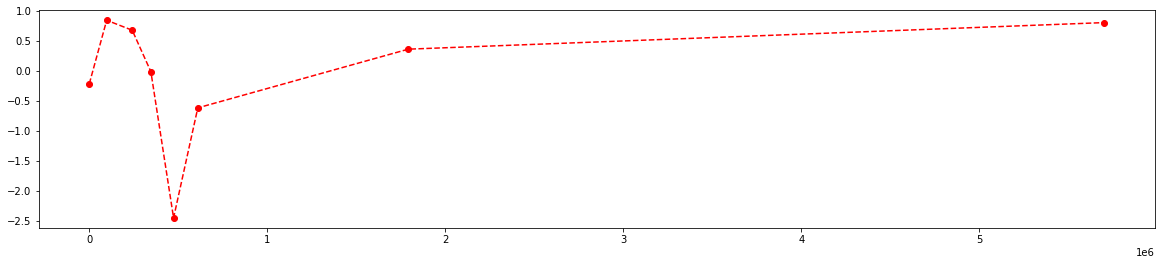

El "IV score" es = 0.38419410027678125


(output                        0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                          
 (-0.001, 97675.62]          980  192     1172     0.557      0.448 -0.218 0.024
 (97675.62, 241201.23]       101   57      158     0.057      0.133  0.840 0.063
 (241201.23, 345958.64]       90   43      133     0.051      0.100  0.673 0.033
 (345958.64, 473499.9]       121   29      150     0.069      0.068 -0.017 0.000
 (473499.9, 609655.15]       143    3      146     0.081      0.007 -2.453 0.182
 (609655.15, 1792496.156]    122   16      138     0.069      0.037 -0.620 0.020
 (1792496.156, 5700426.25]   109   38      147     0.062      0.089  0.358 0.010
 (5700426.25, 283484419.52]   94   51      145     0.053      0.119  0.800 0.052,
 0.38419410027678125)

In [88]:
calc_woe_and_iv(df_train,df_train_label,'v12',15)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v13 con 60 rangos


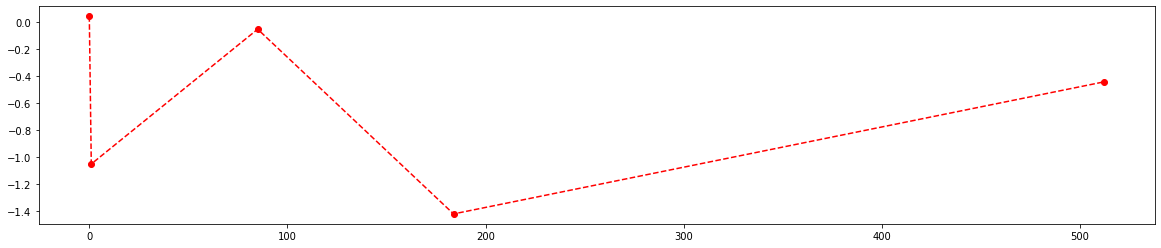

El "IV score" es = 0.04364895692467646


(output                 0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                   
 (-0.001, 1.0]       1634  415     2049     0.928      0.967  0.041 0.002
 (1.0, 85.0]           47    4       51     0.027      0.009 -1.052 0.018
 (85.0, 183.867]       13    3       16     0.007      0.007 -0.055 0.000
 (183.867, 512.133]    34    2       36     0.019      0.005 -1.422 0.021
 (512.133, 5991.0]     32    5       37     0.018      0.012 -0.445 0.003,
 0.04364895692467646)

In [89]:
calc_woe_and_iv(df_train,df_train_label,'v13',60) 

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v14 con 60 rangos


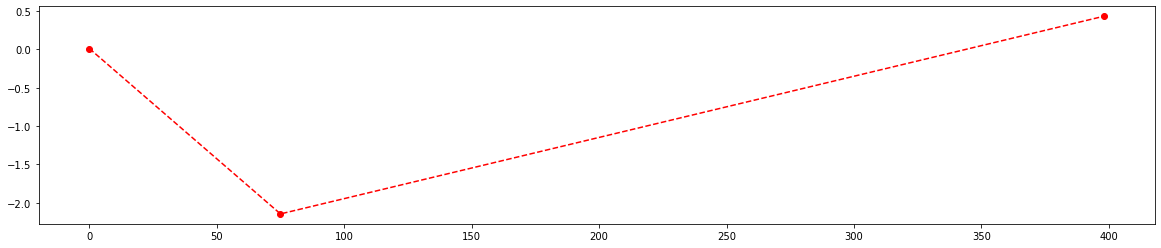

El "IV score" es = 0.040904500279323325


(output               0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                 
 (-0.001, 75.0]    1701  419     2120     0.966      0.977  0.011 0.000
 (75.0, 398.0]       35    1       36     0.020      0.002 -2.144 0.038
 (398.0, 41274.0]    24    9       33     0.014      0.021  0.431 0.003,
 0.040904500279323325)

In [90]:
calc_woe_and_iv(df_train,df_train_label,'v14',60)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v15 con 20 rangos


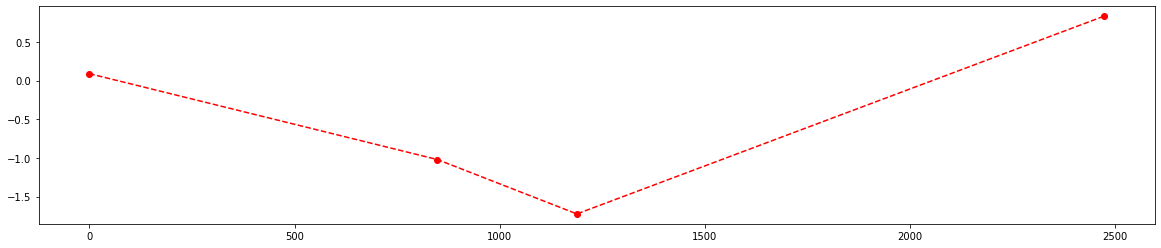

El "IV score" es = 0.1927484296685345


(output                 0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                   
 (-0.001, 848.0]     1404  374     1778     0.798      0.872  0.089 0.007
 (848.0, 1188.0]      205   18      223     0.116      0.042 -1.021 0.076
 (1188.0, 2472.0]      92    4       96     0.052      0.009 -1.724 0.074
 (2472.0, 861279.0]    59   33       92     0.034      0.077  0.831 0.036,
 0.1927484296685345)

In [91]:
calc_woe_and_iv(df_train,df_train_label,'v15',20)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v16 con 10 rangos


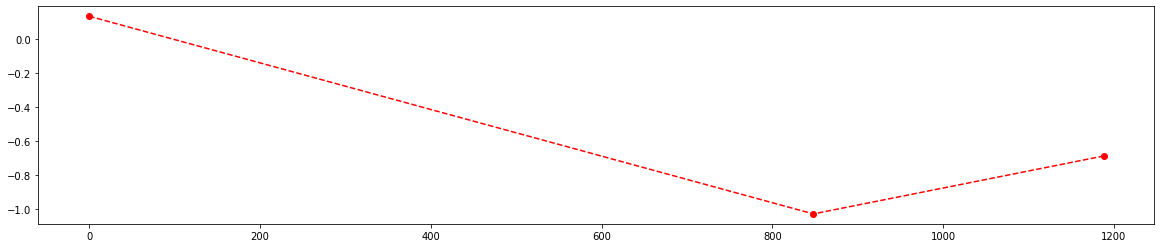

El "IV score" es = 0.12264554298194057


(output                 0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                   
 (-0.001, 848.0]     1406  393     1799     0.799      0.916  0.137 0.016
 (848.0, 1188.0]      207   18      225     0.118      0.042 -1.031 0.078
 (1188.0, 173062.0]   147   18      165     0.084      0.042 -0.688 0.029,
 0.12264554298194057)

In [92]:
calc_woe_and_iv(df_train,df_train_label,'v16',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v17 con 15 rangos


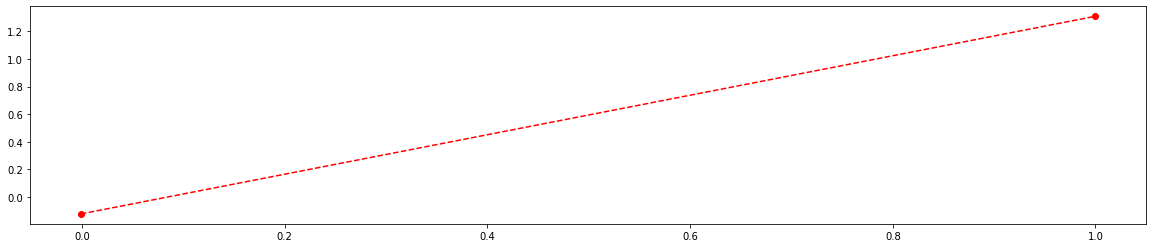

El "IV score" es = 0.15837316358046707


(output            0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                              
 (-0.001, 1.0]  1688  364     2052     0.959      0.848 -0.123 0.014
 (1.0, 24.0]      72   65      137     0.041      0.152  1.309 0.145,
 0.15837316358046707)

In [93]:
calc_woe_and_iv(df_train,df_train_label,'v17',15)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v18 con 10 rangos


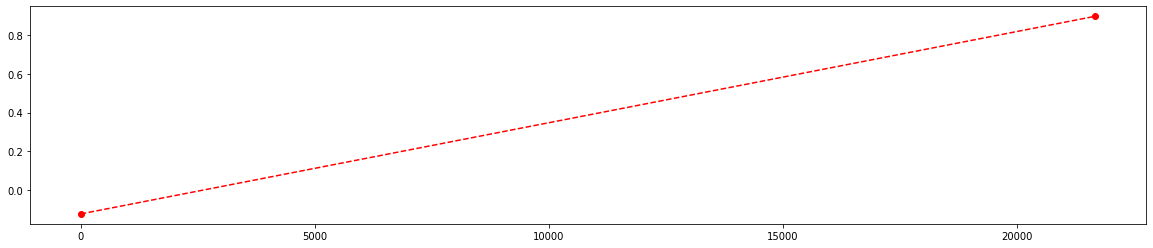

El "IV score" es = 0.10802995090427327


(output                     0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                       
 (-0.001, 21669.0]       1631  352     1983     0.927      0.821 -0.122 0.013
 (21669.0, 10763627.37]   129   77      206     0.073      0.179  0.896 0.095,
 0.10802995090427327)

In [94]:
calc_woe_and_iv(df_train,df_train_label,'v18',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v19 con 10 rangos


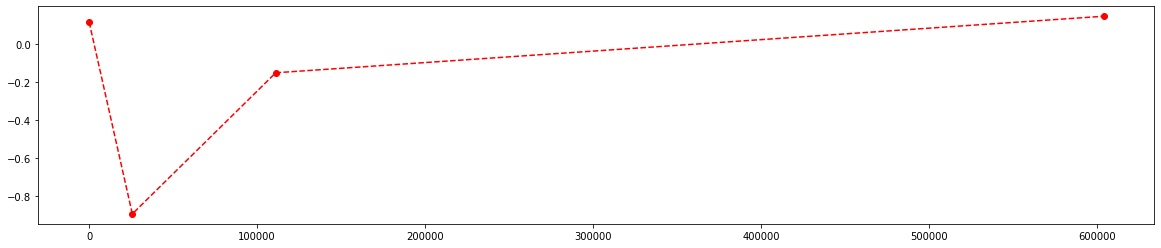

El "IV score" es = 0.07440333979880775


(output                      0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                        
 (-0.001, 25702.3]        1204  329     1533     0.684      0.767  0.114 0.009
 (25702.3, 111137.18]      201   20      221     0.114      0.047 -0.896 0.061
 (111137.18, 604199.98]    277   58      335     0.157      0.135 -0.152 0.003
 (604199.98, 5117872.15]    78   22      100     0.044      0.051  0.146 0.001,
 0.07440333979880775)

In [95]:
calc_woe_and_iv(df_train,df_train_label,'v19',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v20 con 20 rangos


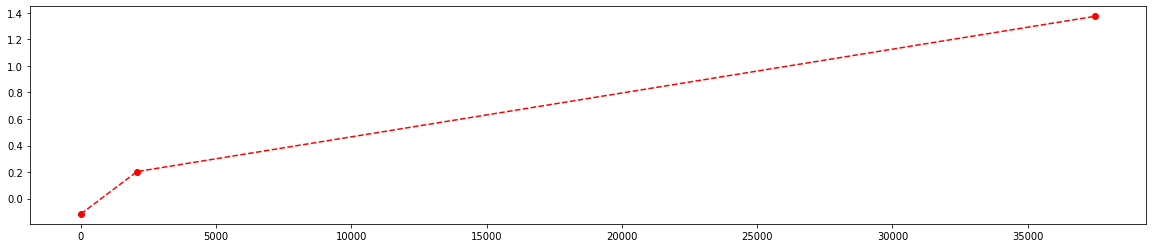

El "IV score" es = 0.13565513114220587


(output                    0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                      
 (-0.001, 2073.99]      1620  352     1972     0.920      0.821 -0.115 0.011
 (2073.99, 37505.0]       87   26      113     0.049      0.061  0.204 0.002
 (37505.0, 1413961.76]    53   51      104     0.030      0.119  1.373 0.122,
 0.13565513114220587)

In [96]:
calc_woe_and_iv(df_train,df_train_label,'v20',20)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v21 con 20 rangos


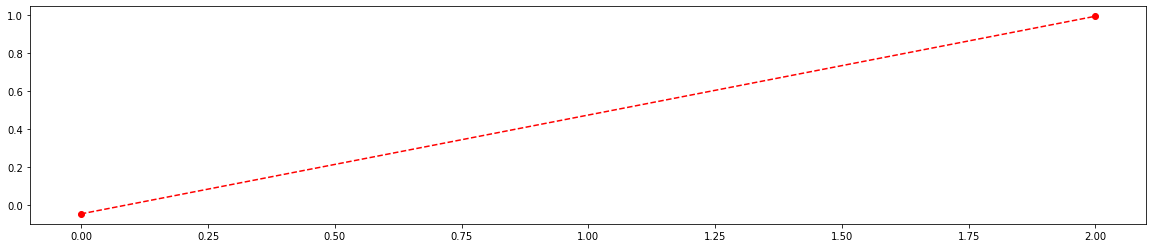

El "IV score" es = 0.047533183313123326


(output            0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                              
 (-0.001, 2.0]  1713  398     2111     0.973      0.928 -0.048 0.002
 (2.0, 62.0]      47   31       78     0.027      0.072  0.995 0.045,
 0.047533183313123326)

In [97]:
calc_woe_and_iv(df_train,df_train_label,'v21',20)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v22 con 20 rangos


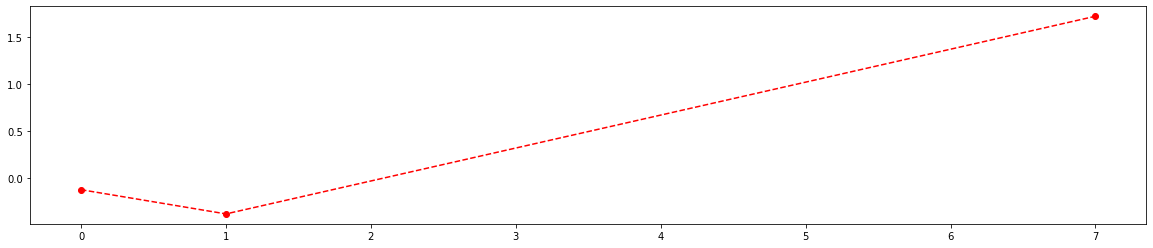

El "IV score" es = 0.22670777965747493


(output            0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                              
 (-0.001, 1.0]  1636  353     1989     0.930      0.823 -0.122 0.013
 (1.0, 7.0]       78   13       91     0.044      0.030 -0.380 0.005
 (7.0, 145.0]     46   63      109     0.026      0.147  1.726 0.208,
 0.22670777965747493)

In [98]:
calc_woe_and_iv(df_train,df_train_label,'v22',20)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v23 con 12 rangos


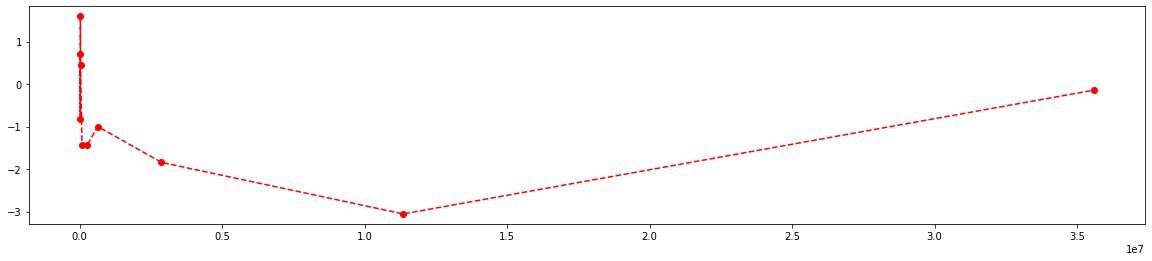

El "IV score" es = 1.2180463575595772


(output                            0    1  total_N  ...  porc_good    woe    iv
 ranks                                              ...                        
 (-0.001, 16292.585]             393  194      587  ...      0.452  0.706 0.162
 (16292.585, 25169.514]          139   15      154  ...      0.035 -0.815 0.036
 (25169.514, 30846.513]           78   94      172  ...      0.219  1.598 0.279
 (30846.513, 82233.967]          132   50      182  ...      0.117  0.441 0.018
 (82233.967, 257552.565]         172   10      182  ...      0.023 -1.433 0.107
 (257552.565, 636730.21]         173   10      183  ...      0.023 -1.439 0.108
 (636730.21, 2867600.603]        167   15      182  ...      0.035 -0.998 0.060
 (2867600.603, 11353328.873]     181    7      188  ...      0.016 -1.841 0.159
 (11353328.873, 35600415.522]    174    2      176  ...      0.005 -3.054 0.288
 (35600415.522, 1357272135.553]  151   32      183  ...      0.075 -0.140 0.002
 
 [10 rows x 7 columns], 1.218046357559

In [99]:
calc_woe_and_iv(df_train,df_train_label,'v23',12) 

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v24 con 15 rangos


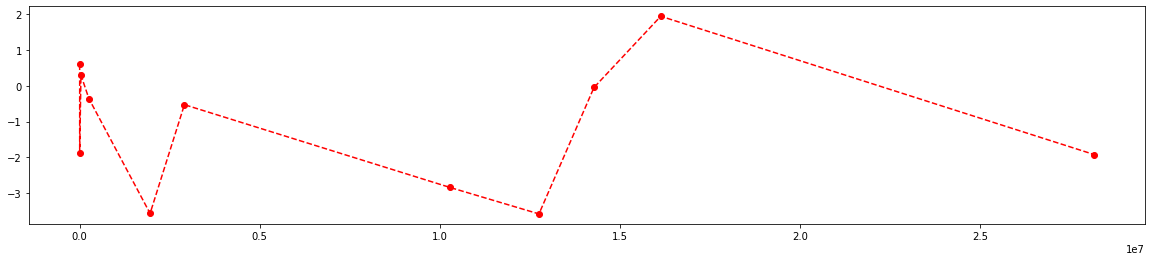

El "IV score" es = 1.5942500037416318


(output                          0    1  total_N  ...  porc_good    woe    iv
 ranks                                            ...                        
 (-0.001, 0.00333]             506  224      730  ...      0.522  0.597 0.140
 (0.00333, 35601.6]            163    6      169  ...      0.014 -1.890 0.149
 (35601.6, 255187.26]           94   31      125  ...      0.072  0.302 0.006
 (255187.26, 1954892.22]       123   21      144  ...      0.049 -0.356 0.007
 (1954892.22, 2908278.46]      145    1      146  ...      0.002 -3.565 0.285
 (2908278.46, 10274418.76]     132   19      151  ...      0.044 -0.527 0.016
 (10274418.76, 12752659.39]    140    2      142  ...      0.005 -2.837 0.212
 (12752659.39, 14280359.63]    147    1      148  ...      0.002 -3.579 0.291
 (14280359.63, 16134256.08]    116   27      143  ...      0.063 -0.046 0.000
 (16134256.08, 28169672.37]     54   92      146  ...      0.214  1.944 0.357
 (28169672.37, 630195304.601]  140    5      145  ...      0.012

In [100]:
calc_woe_and_iv(df_train,df_train_label,'v24',15)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v25 con 15 rangos


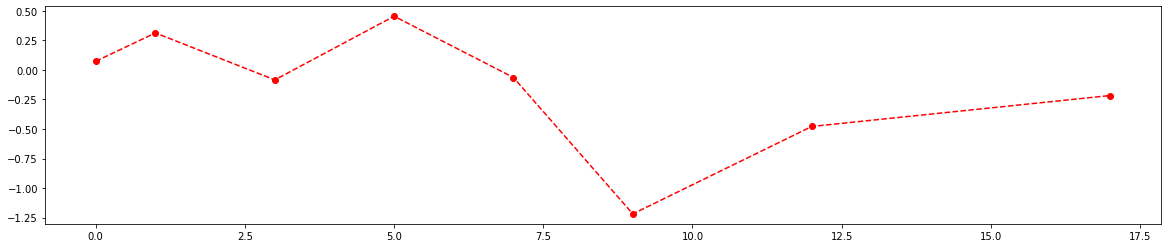

El "IV score" es = 0.09633845362859278


(output           0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                             
 (-0.001, 1.0]  969  254     1223     0.551      0.592  0.073 0.003
 (1.0, 3.0]     105   35      140     0.060      0.082  0.313 0.007
 (3.0, 5.0]     125   28      153     0.071      0.065 -0.084 0.000
 (5.0, 7.0]      99   38      137     0.056      0.089  0.454 0.015
 (7.0, 9.0]     105   24      129     0.060      0.056 -0.064 0.000
 (9.0, 12.0]    111    8      119     0.063      0.019 -1.218 0.054
 (12.0, 17.0]   139   21      160     0.079      0.049 -0.478 0.014
 (17.0, 38.0]   107   21      128     0.061      0.049 -0.217 0.003,
 0.09633845362859278)

In [101]:
calc_woe_and_iv(df_train,df_train_label,'v25',15)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v26 con 10 rangos


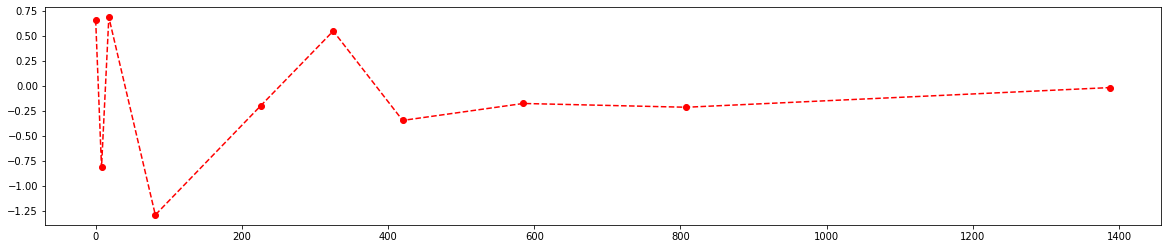

El "IV score" es = 0.3250474403952597


(output               0   1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                
 (-0.001, 8.0]      187  88      275     0.106      0.205  0.658 0.065
 (8.0, 18.0]        176  19      195     0.100      0.044 -0.814 0.045
 (18.0, 81.6]       126  61      187     0.072      0.142  0.686 0.048
 (81.6, 226.0]      209  14      223     0.119      0.033 -1.292 0.111
 (226.0, 325.0]     205  41      246     0.116      0.096 -0.198 0.004
 (325.0, 420.0]     147  62      209     0.084      0.145  0.548 0.033
 (420.0, 585.0]     174  30      204     0.099      0.070 -0.346 0.010
 (585.0, 808.0]     186  38      224     0.106      0.089 -0.177 0.003
 (808.0, 1388.0]    183  36      219     0.104      0.084 -0.214 0.004
 (1388.0, 41382.0]  167  40      207     0.095      0.093 -0.018 0.000,
 0.3250474403952597)

In [102]:
calc_woe_and_iv(df_train,df_train_label,'v26',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v27 con 10 rangos


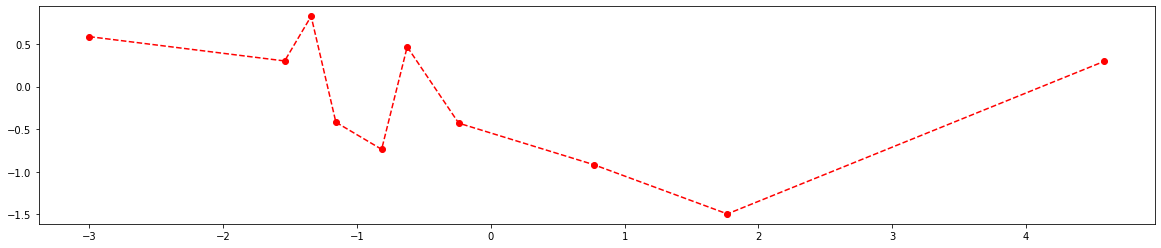

El "IV score" es = 0.4404037656096578


(output              0   1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                               
 (-3.001, -1.541]  153  67      220     0.087      0.156  0.586 0.041
 (-1.541, -1.343]  164  54      218     0.093      0.126  0.301 0.010
 (-1.343, -1.158]  142  79      221     0.081      0.184  0.825 0.085
 (-1.158, -0.816]  187  30      217     0.106      0.070 -0.418 0.015
 (-0.816, -0.625]  197  23      220     0.112      0.054 -0.736 0.043
 (-0.625, -0.24]   157  61      218     0.089      0.142  0.466 0.025
 (-0.24, 0.769]    189  30      219     0.107      0.070 -0.429 0.016
 (0.769, 1.768]    205  20      225     0.116      0.047 -0.916 0.064
 (1.768, 4.582]    201  11      212     0.114      0.026 -1.494 0.132
 (4.582, 8.083]    165  54      219     0.094      0.126  0.295 0.009,
 0.4404037656096578)

In [103]:
calc_woe_and_iv(df_train,df_train_label,'v27',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v28 con 10 rangos


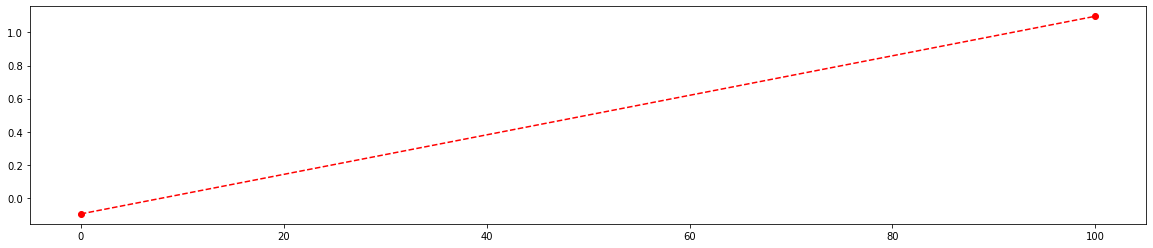

El "IV score" es = 0.105832593003581


(output      0    1  total_N  porc_bad  porc_good    woe    iv
 v28                                                          
 0.000    1682  372     2054     0.956      0.867 -0.097 0.009
 100.000    78   57      135     0.044      0.133  1.098 0.097,
 0.105832593003581)

In [104]:
calc_woe_and_iv(df_train,df_train_label,'v28',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v29 con 10 rangos


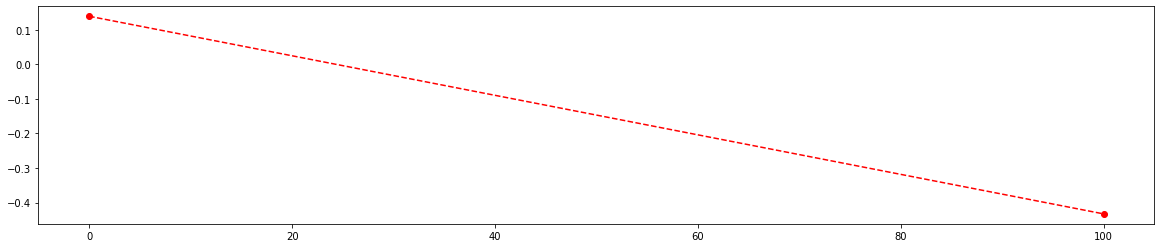

El "IV score" es = 0.0599761720686027


(output      0    1  total_N  porc_bad  porc_good    woe    iv
 v29                                                          
 0.000    1235  346     1581     0.702      0.807  0.139 0.015
 100.000   525   83      608     0.298      0.193 -0.433 0.045,
 0.0599761720686027)

In [105]:
calc_woe_and_iv(df_train,df_train_label,'v29',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v30 con 7 rangos


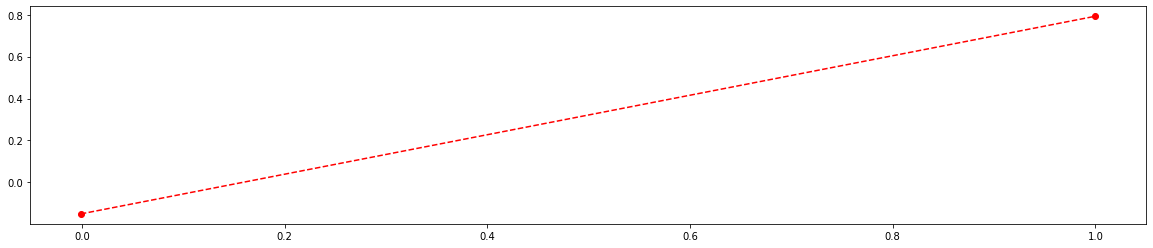

El "IV score" es = 0.11787195928083596


(output            0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                              
 (-0.001, 1.0]  1578  331     1909     0.897      0.772 -0.150 0.019
 (1.0, 165.0]    182   98      280     0.103      0.228  0.793 0.099,
 0.11787195928083596)

In [106]:
calc_woe_and_iv(df_train,df_train_label,'v30',7)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v31 con 7 rangos


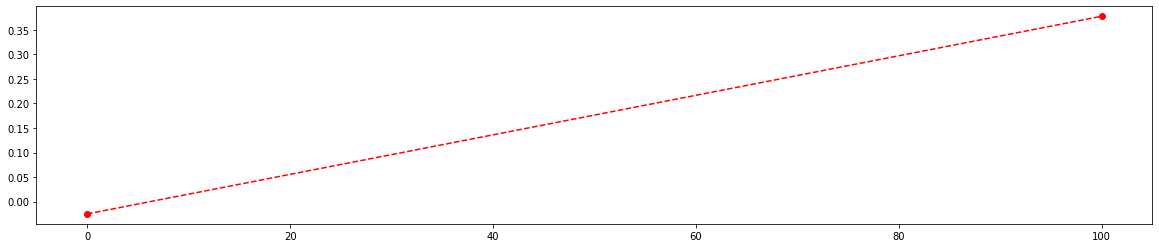

El "IV score" es = 0.009442538754091572


(output      0    1  total_N  porc_bad  porc_good    woe    iv
 v31                                                          
 0.000    1670  397     2067     0.949      0.925 -0.025 0.001
 100.000    90   32      122     0.051      0.075  0.378 0.009,
 0.009442538754091572)

In [107]:
calc_woe_and_iv(df_train,df_train_label,'v31',7)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v32 con 7 rangos


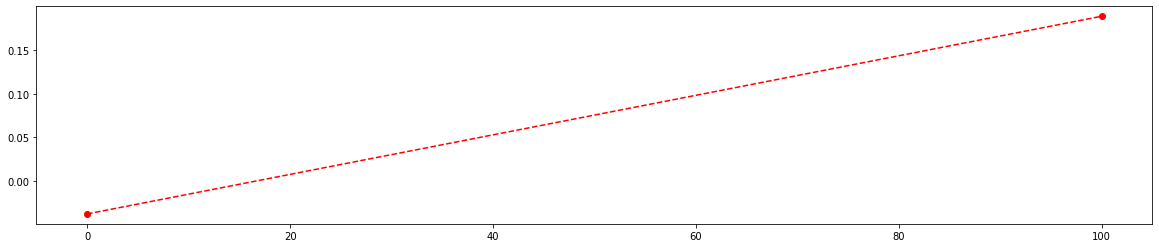

El "IV score" es = 0.0070648207206965765


(output      0    1  total_N  porc_bad  porc_good    woe    iv
 v32                                                          
 0.000    1495  351     1846     0.849      0.818 -0.037 0.001
 100.000   265   78      343     0.151      0.182  0.189 0.006,
 0.0070648207206965765)

In [108]:
calc_woe_and_iv(df_train,df_train_label,'v32',7)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v33 con 10 rangos


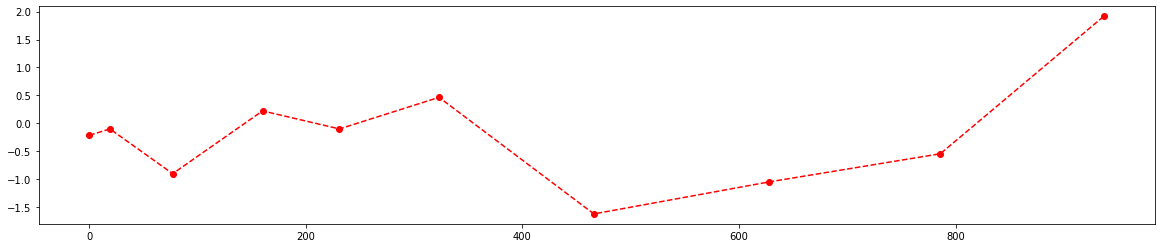

El "IV score" es = 0.8359011070287994


(output             0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                               
 (-0.001, 19.0]   189   37      226     0.107      0.086 -0.219 0.005
 (19.0, 77.0]     182   40      222     0.103      0.093 -0.104 0.001
 (77.0, 160.0]    193   19      212     0.110      0.044 -0.907 0.059
 (160.0, 231.0]   168   51      219     0.095      0.119  0.219 0.005
 (231.0, 323.0]   182   40      222     0.103      0.093 -0.104 0.001
 (323.0, 466.0]   155   60      215     0.088      0.140  0.463 0.024
 (466.0, 628.0]   209   10      219     0.119      0.023 -1.628 0.155
 (628.0, 786.0]   200   17      217     0.114      0.040 -1.053 0.078
 (786.0, 937.0]   206   29      235     0.117      0.068 -0.549 0.027
 (937.0, 1286.0]   76  126      202     0.043      0.294  1.917 0.480,
 0.8359011070287994)

In [109]:
calc_woe_and_iv(df_train,df_train_label,'v33',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v34 con 10 rangos


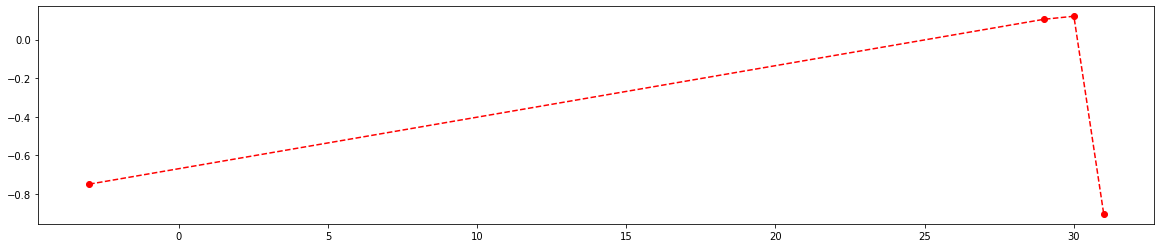

El "IV score" es = 0.09092293826180195


(output            0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                              
 (-3.001, 29.0]  243   28      271     0.138      0.065 -0.749 0.055
 (29.0, 30.0]    469  127      596     0.266      0.296  0.105 0.003
 (30.0, 31.0]    967  266     1233     0.549      0.620  0.121 0.009
 (31.0, 731.0]    81    8       89     0.046      0.019 -0.903 0.025,
 0.09092293826180195)

In [110]:
calc_woe_and_iv(df_train,df_train_label,'v34',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v35 con 10 rangos


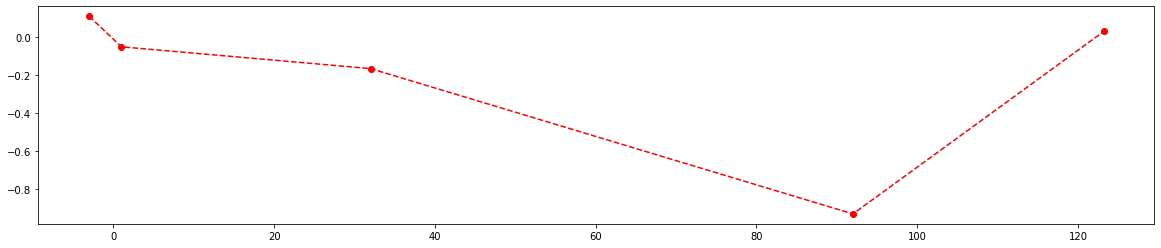

El "IV score" es = 0.061201850306373054


(output              0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                                
 (-3.001, 1.0]    1083  295     1378     0.615      0.688  0.111 0.008
 (1.0, 32.0]       138   32      170     0.078      0.075 -0.050 0.000
 (32.0, 92.0]      208   43      251     0.118      0.100 -0.165 0.003
 (92.0, 123.2]     156   15      171     0.089      0.035 -0.930 0.050
 (123.2, 1280.0]   175   44      219     0.099      0.103  0.031 0.000,
 0.061201850306373054)

In [111]:
calc_woe_and_iv(df_train,df_train_label,'v35',10)

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v36 con 10 rangos


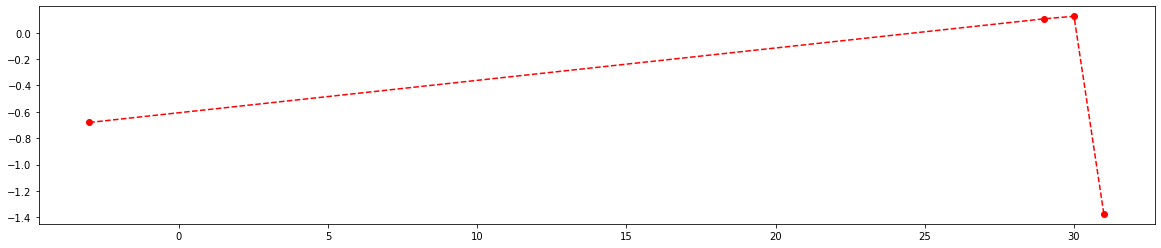

El "IV score" es = 0.10575487301912107


(output            0    1  total_N  porc_bad  porc_good    woe    iv
 ranks                                                              
 (-3.001, 29.0]  243   30      273     0.138      0.070 -0.680 0.046
 (29.0, 30.0]    469  127      596     0.266      0.296  0.105 0.003
 (30.0, 31.0]    967  267     1234     0.549      0.622  0.125 0.009
 (31.0, 731.0]    81    5       86     0.046      0.012 -1.373 0.047,
 0.10575487301912107)

In [112]:
calc_woe_and_iv(df_train,df_train_label,'v36',10) 

### Creación de las variables WoE

In [113]:
def assign_woe(x,woe_df):
  n_columns = woe_df.shape[1]
  n_rows = woe_df.shape[0]

  for i in range(n_rows):
    x = float(x)
    if not isinstance(woe_df.index[i],float):
      left = float(woe_df.index[i].left)
      right = float(woe_df.index[i].right)
      if left < x and x <= right:
        return woe_df.woe[i]
      elif i == len(range(n_rows))-1:
        return woe_df.woe[i]
      else:
        continue
    else:
      if x == float(woe_df.index[i]):
        return woe_df.iloc[i,5]
      elif i == len(range(n_rows))-1:
        return woe_df.iloc[i,5]
      else: 
        continue


In [114]:
#Se trabajará sólo con las variables continuas no correlacionadas
df_train[notcorr_continuous_vars].columns

Index(['v0', 'v1', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17',
       'v18', 'v19', 'v2', 'v20', 'v21', 'v22', 'v24', 'v25', 'v27', 'v28',
       'v29', 'v31', 'v32', 'v33', 'v34', 'v35', 'v4', 'v5', 'v7', 'v8', 'v9'],
      dtype='object')

In [115]:
# necesita procesar continuos_vars, bins
bins_dict = { 'v0':50, 'v1':10, 'v2':20, 'v3':10, 'v4':10, 'v5':10,
        'v6':10, 'v7':200, 'v8':19, 'v9':10, 'v10':10, 
        'v11': 10, 'v12':15, 'v13':60, 'v14':60, 'v15':20,
        'v16':10, 'v17':15, 'v18':10, 'v19':10, 'v20':20,
        'v21': 20, 'v22': 20, 'v23': 12, 'v24': 15, 'v25': 15,
        'v26': 10, 'v27': 10, 'v28': 10, 'v29': 10, 'v30': 7,
        'v31': 7, 'v32': 7, 'v33': 10, 'v34': 10, 'v35': 10,
        'v36': 10}

In [116]:
bins = []
for var in notcorr_continuous_vars:
  bins.append(bins_dict[var])
print(bins)
len(bins), len(notcorr_continuous_vars)

[50, 10, 10, 10, 15, 60, 60, 20, 10, 15, 10, 10, 20, 20, 20, 20, 15, 15, 10, 10, 10, 7, 7, 10, 10, 10, 10, 10, 200, 19, 10]


(31, 31)

In [117]:
#Función definitiva para transformar los datos de tal forma que se pueda trabajar con sus WoE
def df_train_and_test_with_woe(df_train,df_train_label,continous_vars_list,bins_list,df_test):
  df_init_woe = df_train.copy(deep=True)
  df_out_woe = df_test.copy(deep=True)
  df_init_iv = pd.DataFrame(columns=['Var_Name','IV_Rank','Predictive_Power'])
  woe_vars = []

  for i,(var_name,bins) in enumerate(zip(continous_vars_list,bins_list)):
    var_prefix = "woe_"
    woe_var_df, iv_score = calc_woe_and_iv(df_init_woe,df_train_label,var_name,bins)
    woe_vars.append(var_prefix+var_name)

    df_init_woe[var_prefix+var_name] = df_init_woe[var_name].map(lambda x: assign_woe(x,woe_var_df))
    df_out_woe[var_prefix+var_name] = df_out_woe[var_name].map(lambda x: assign_woe(x,woe_var_df))

    if iv_score < 0.02:
      pred_pow = 'useless'
    elif iv_score < 0.1:
      pred_pow = 'weak'
    elif iv_score < 0.3:
      pred_pow = 'medium'
    elif iv_score < 0.5:
      pred_pow = 'strong'
    else:
      pred_pow = 'suspicious'

    df_init_iv = df_init_iv.append({'IV_Rank': iv_score,'Predictive_Power':pred_pow, 'Var_Name':var_prefix+var_name}, ignore_index=True)
  
  return df_init_woe , df_init_iv , df_out_woe, woe_vars

El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v0 con 50 rangos


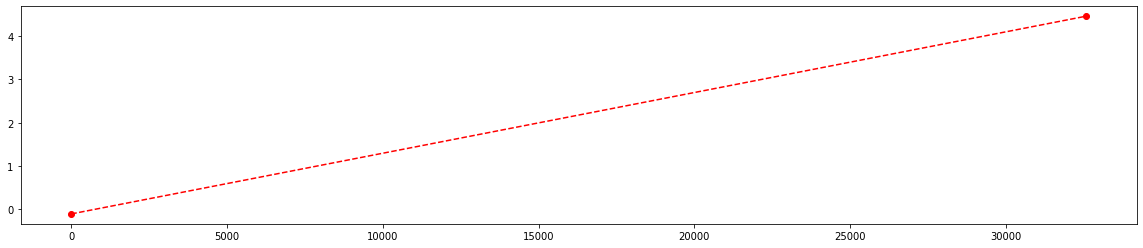

El "IV score" es = 0.4410611026217843
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v1 con 10 rangos


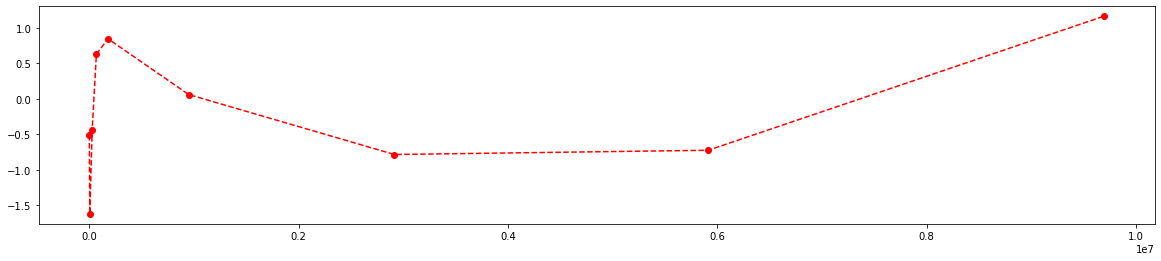

El "IV score" es = 0.6198777964580664
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v10 con 10 rangos


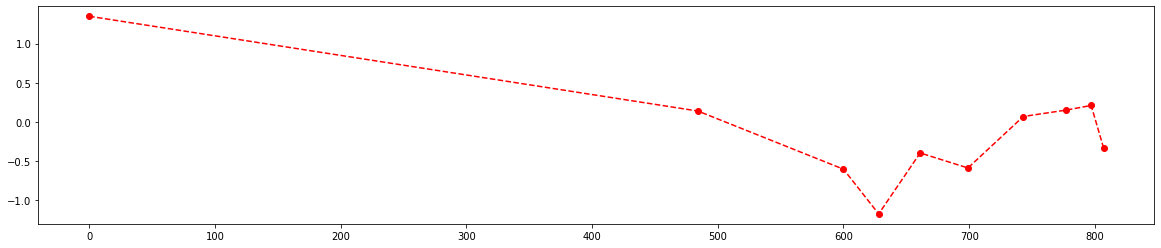

El "IV score" es = 0.4302410954839192
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v11 con 10 rangos


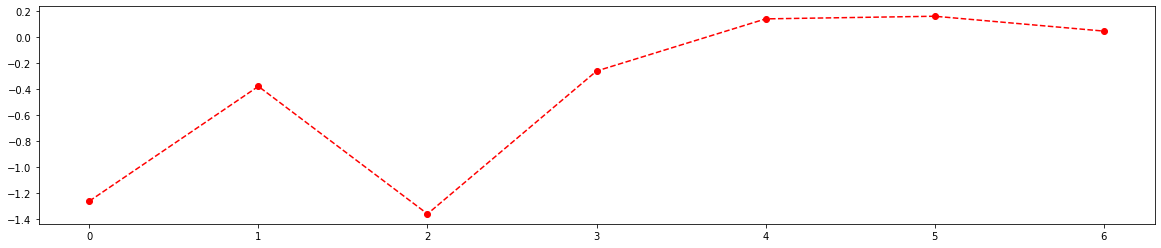

El "IV score" es = 0.057370937332350144
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v12 con 15 rangos


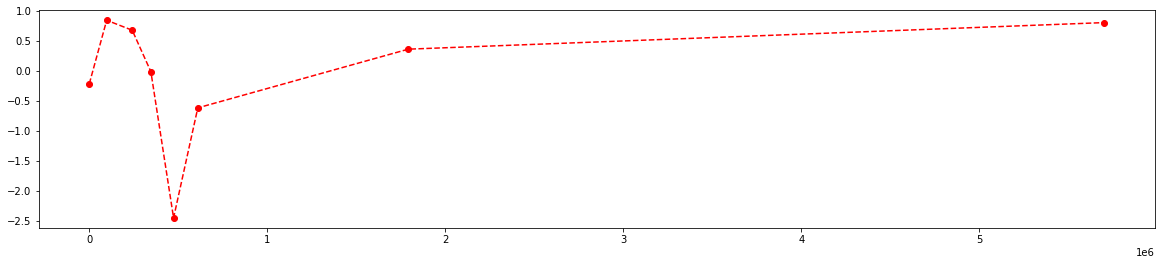

El "IV score" es = 0.38419410027678125
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v13 con 60 rangos


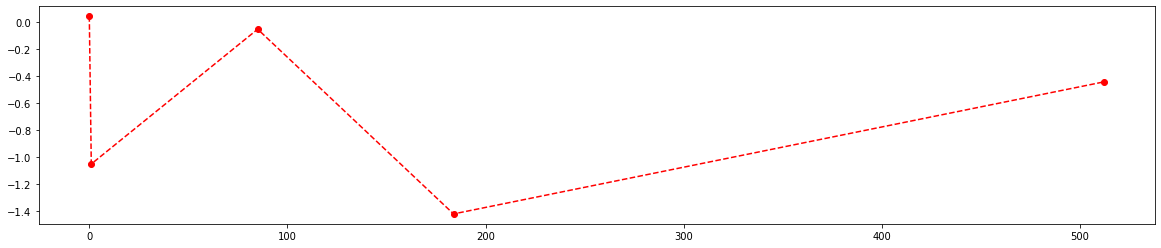

El "IV score" es = 0.04364895692467646
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v14 con 60 rangos


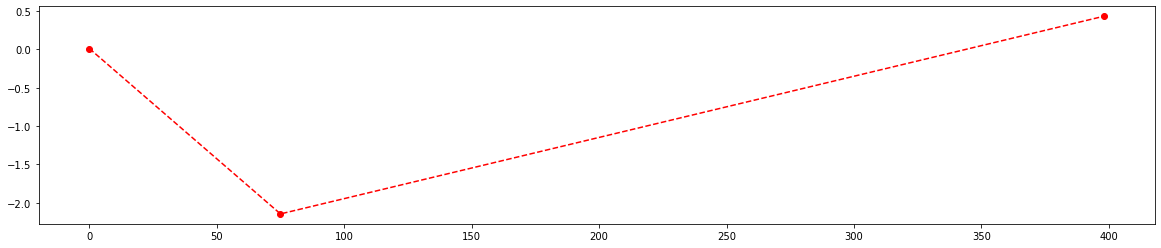

El "IV score" es = 0.040904500279323325
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v15 con 20 rangos


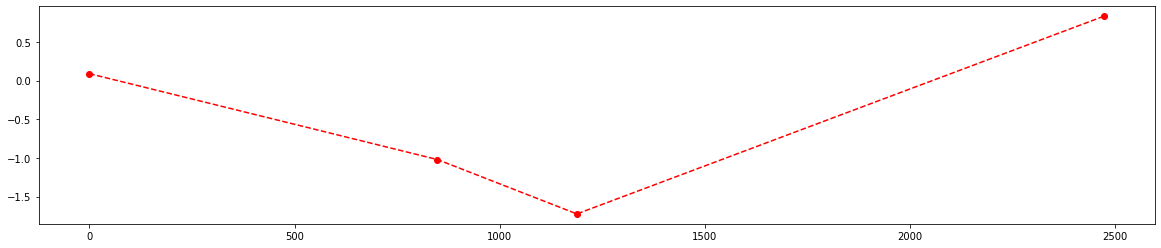

El "IV score" es = 0.1927484296685345
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v16 con 10 rangos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

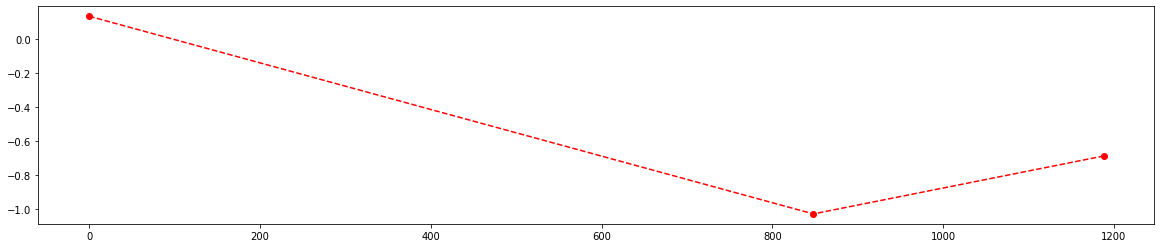

El "IV score" es = 0.12264554298194057
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v17 con 15 rangos


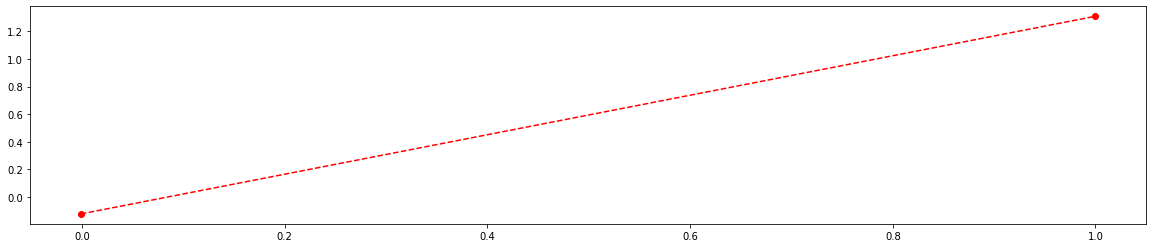

El "IV score" es = 0.15837316358046707
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v18 con 10 rangos


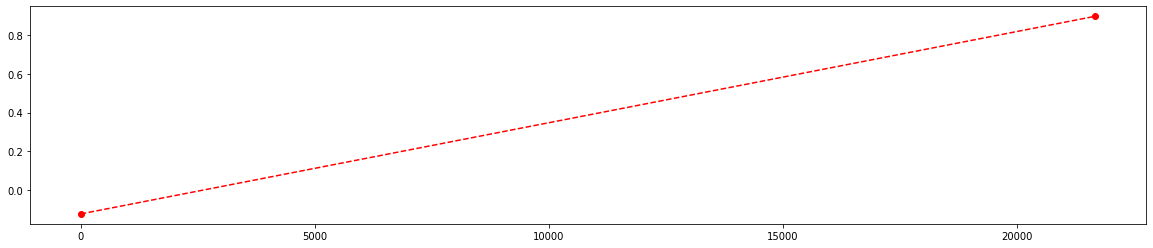

El "IV score" es = 0.10802995090427327
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v19 con 10 rangos


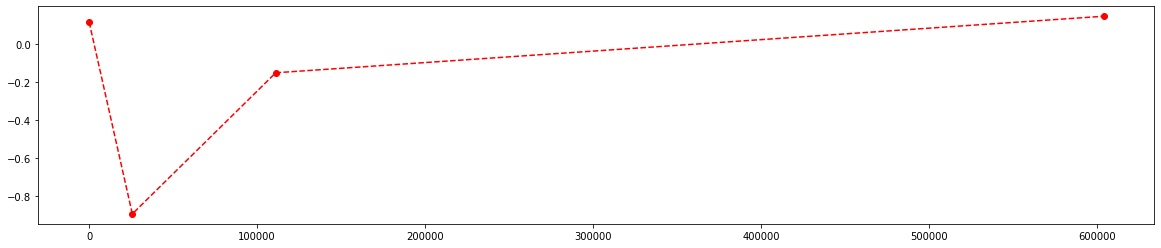

El "IV score" es = 0.07440333979880775
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v2 con 20 rangos


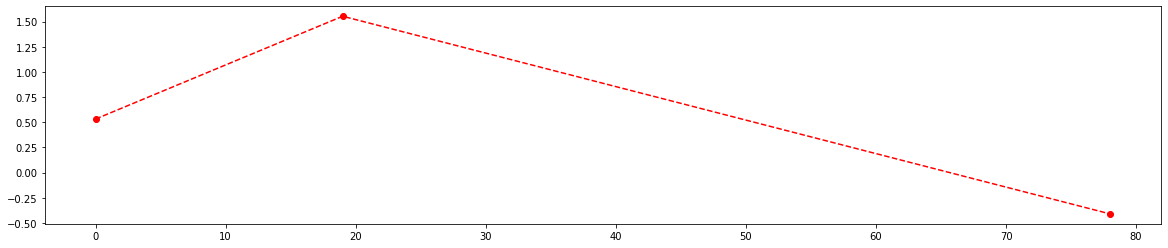

El "IV score" es = 0.49649929937901444
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v20 con 20 rangos


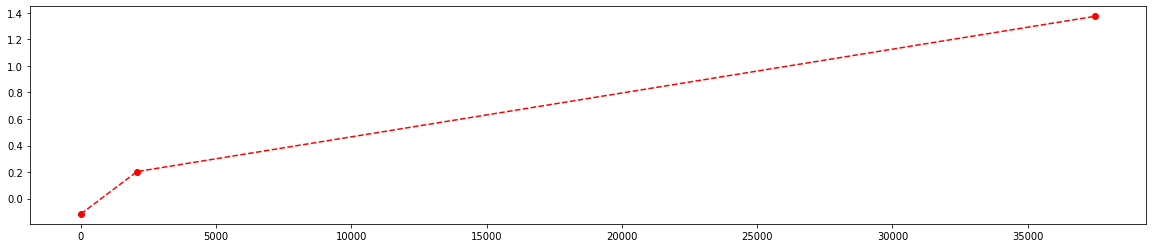

El "IV score" es = 0.13565513114220587
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v21 con 20 rangos


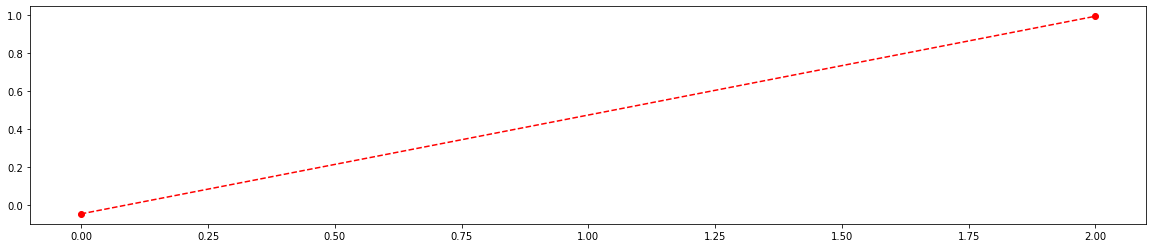

El "IV score" es = 0.047533183313123326
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v22 con 20 rangos


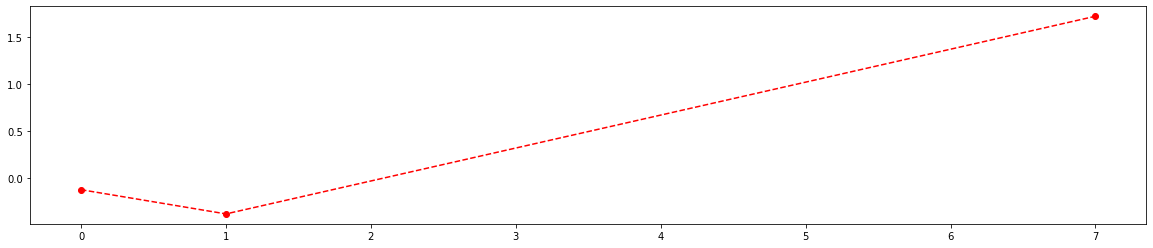

El "IV score" es = 0.22670777965747493
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v24 con 15 rangos


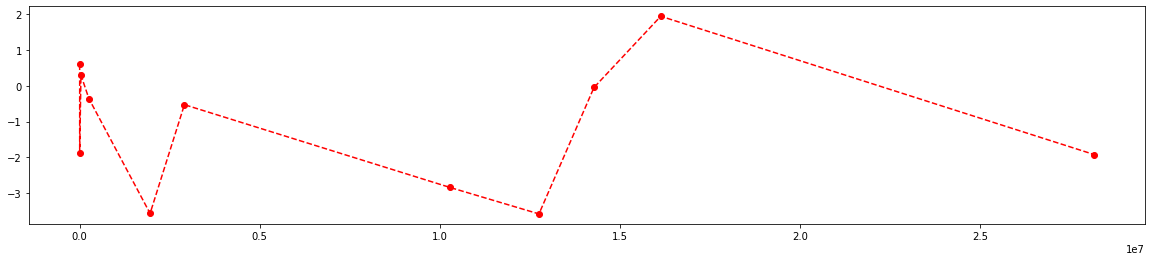

El "IV score" es = 1.5942500037416318
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v25 con 15 rangos


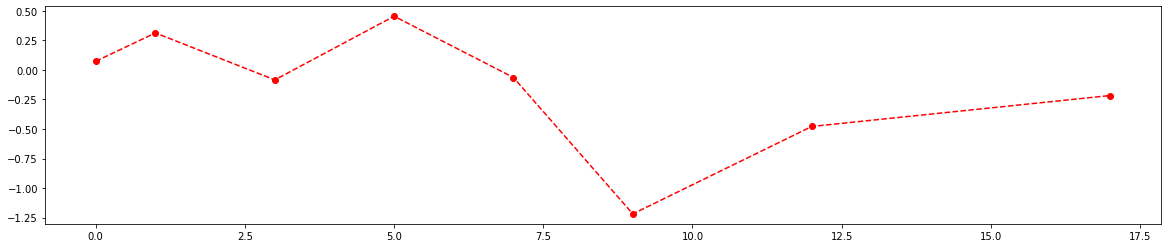

El "IV score" es = 0.09633845362859278
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v27 con 10 rangos


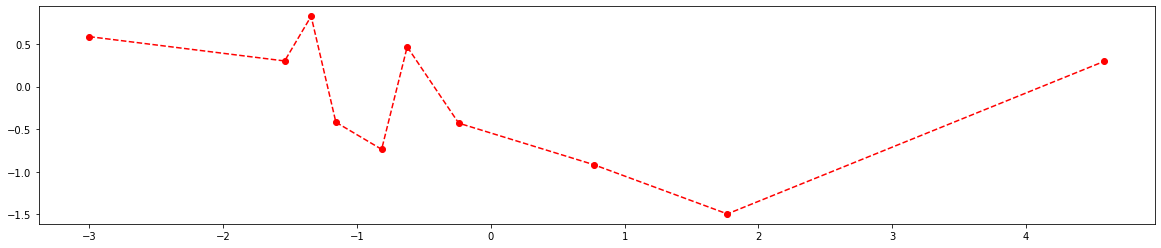

El "IV score" es = 0.4404037656096578
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v28 con 10 rangos


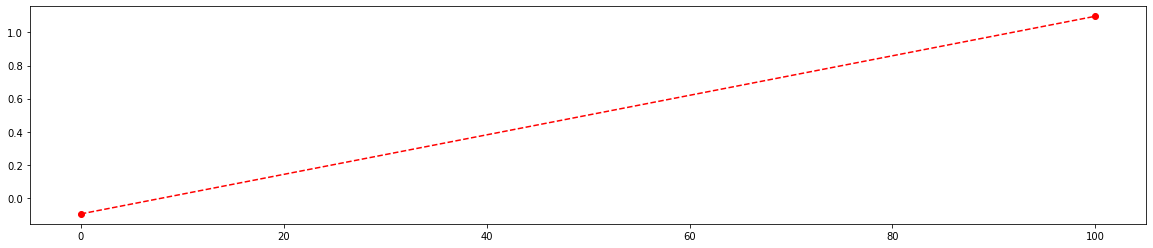

El "IV score" es = 0.105832593003581
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v29 con 10 rangos


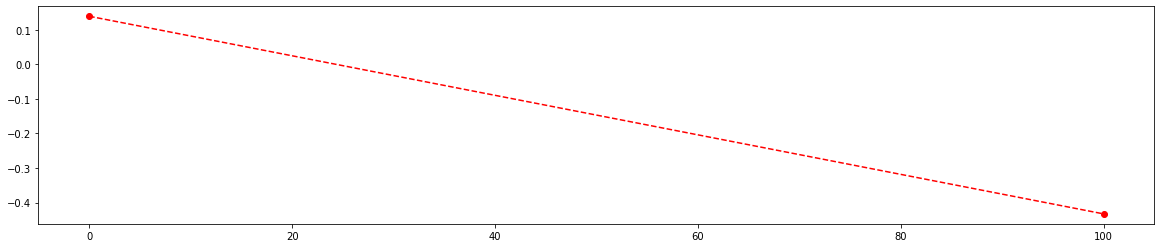

El "IV score" es = 0.0599761720686027
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v31 con 7 rangos


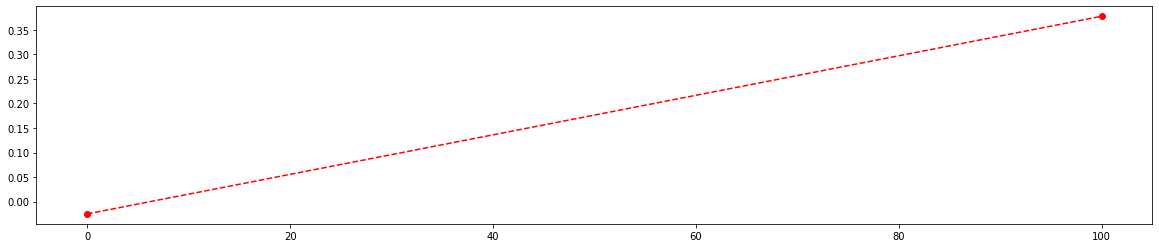

El "IV score" es = 0.009442538754091572
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v32 con 7 rangos


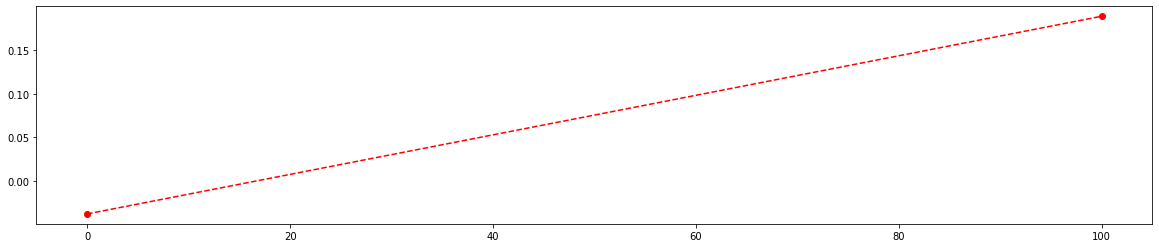

El "IV score" es = 0.0070648207206965765
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v33 con 10 rangos


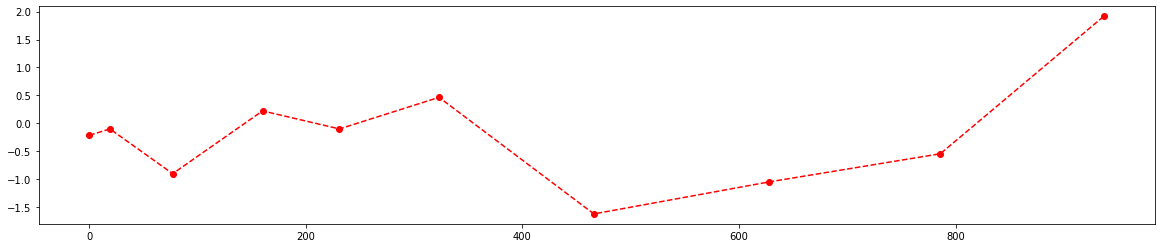

El "IV score" es = 0.8359011070287994
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v34 con 10 rangos


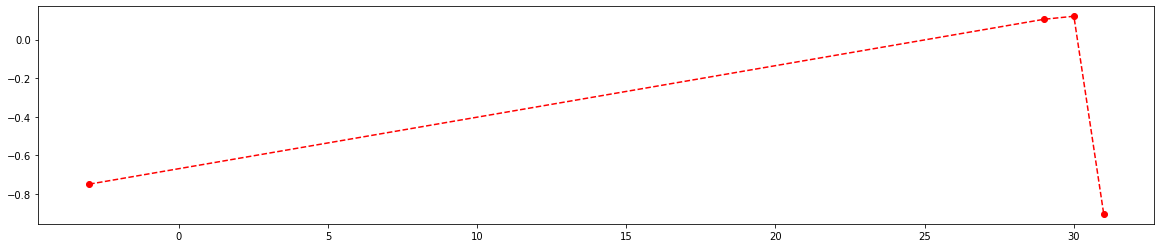

El "IV score" es = 0.09092293826180195
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v35 con 10 rangos


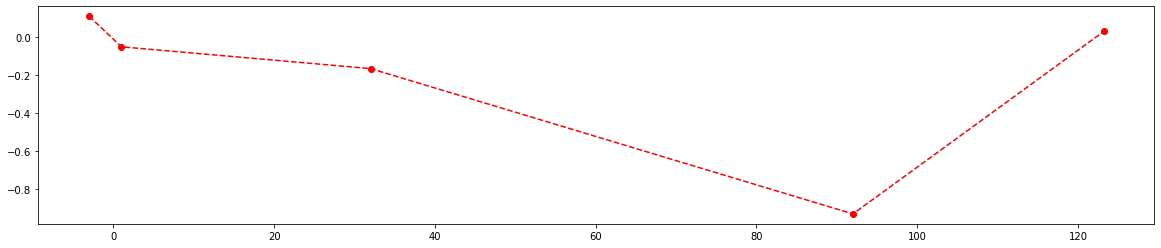

El "IV score" es = 0.061201850306373054
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v4 con 10 rangos


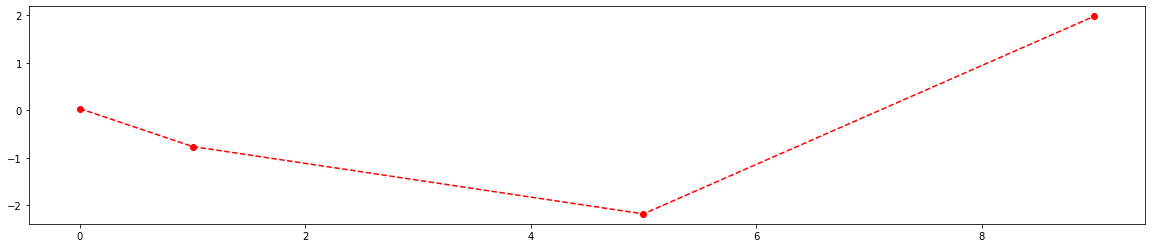

El "IV score" es = 0.8104760416735252
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v5 con 10 rangos


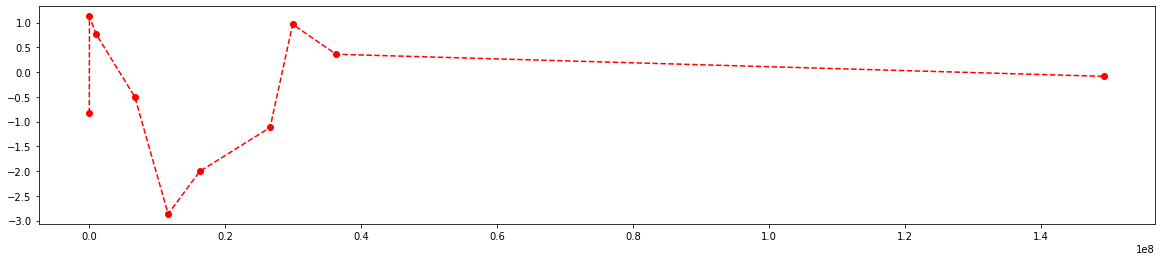

El "IV score" es = 1.0856023450802923
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v7 con 200 rangos


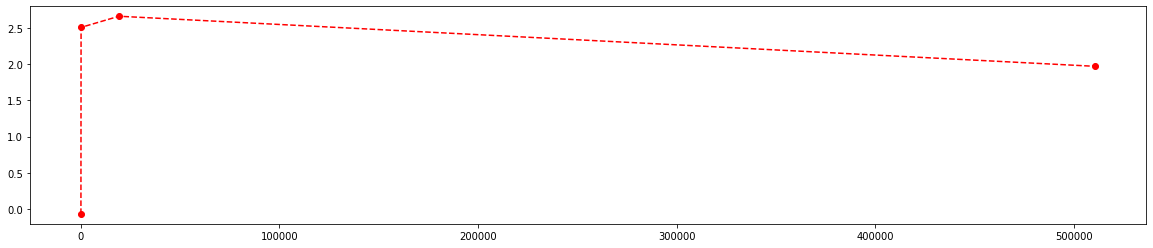

El "IV score" es = 0.16968816670039838
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v8 con 19 rangos


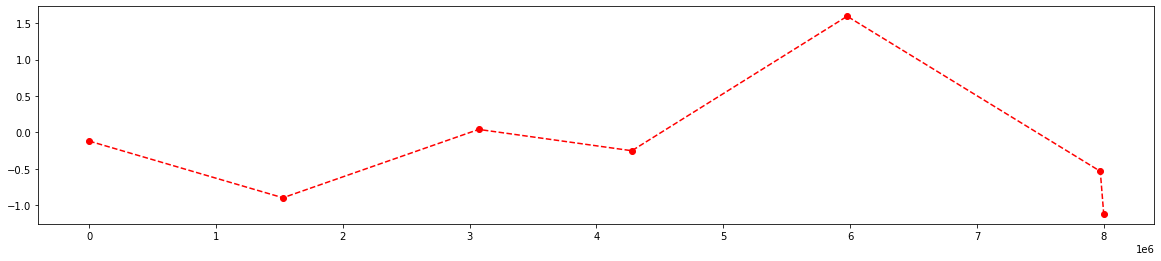

El "IV score" es = 0.42789850274585267
El 5% de las observaciones que debe cumplir cada intervalo es: 109.45, para v9 con 10 rangos


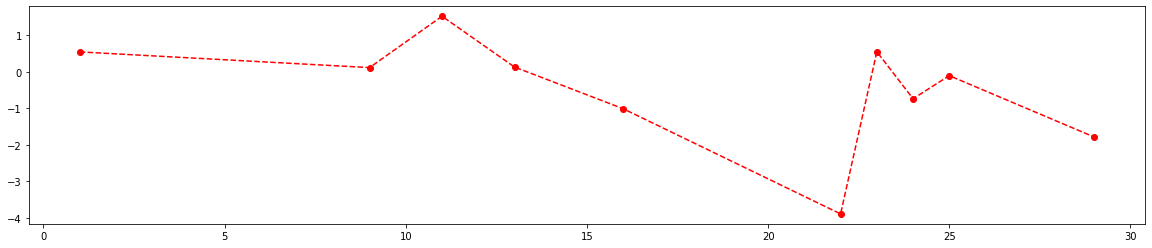

El "IV score" es = 0.8908376564483325


In [118]:
df_train_woe, df_train_iv, df_test_woe, woe_columns = df_train_and_test_with_woe(df_train,df_train_label,notcorr_continuous_vars,bins,df_test)

In [119]:
for var in (woe_columns):
  print(var ,": ",df_train_woe[var].isnull().sum().sum())

woe_v0 :  0
woe_v1 :  0
woe_v10 :  0
woe_v11 :  0
woe_v12 :  0
woe_v13 :  0
woe_v14 :  0
woe_v15 :  0
woe_v16 :  0
woe_v17 :  0
woe_v18 :  0
woe_v19 :  0
woe_v2 :  0
woe_v20 :  0
woe_v21 :  0
woe_v22 :  0
woe_v24 :  0
woe_v25 :  0
woe_v27 :  0
woe_v28 :  0
woe_v29 :  0
woe_v31 :  0
woe_v32 :  0
woe_v33 :  0
woe_v34 :  0
woe_v35 :  0
woe_v4 :  0
woe_v5 :  0
woe_v7 :  0
woe_v8 :  0
woe_v9 :  0


In [120]:
for var in (woe_columns):
  print(var ,": ",df_test_woe[var].isnull().sum().sum())

woe_v0 :  0
woe_v1 :  0
woe_v10 :  0
woe_v11 :  0
woe_v12 :  0
woe_v13 :  0
woe_v14 :  0
woe_v15 :  0
woe_v16 :  0
woe_v17 :  0
woe_v18 :  0
woe_v19 :  0
woe_v2 :  0
woe_v20 :  0
woe_v21 :  0
woe_v22 :  0
woe_v24 :  0
woe_v25 :  0
woe_v27 :  0
woe_v28 :  0
woe_v29 :  0
woe_v31 :  0
woe_v32 :  0
woe_v33 :  0
woe_v34 :  0
woe_v35 :  0
woe_v4 :  0
woe_v5 :  0
woe_v7 :  0
woe_v8 :  0
woe_v9 :  0


In [121]:
ivs =  ['suspicious','strong','medium','weak','useless']
for iv in ivs:
  print(df_train_iv.where(df_train_iv['Predictive_Power'] == iv).dropna())
  print('='*15)

   Var_Name  IV_Rank Predictive_Power
1    woe_v1    0.620       suspicious
16  woe_v24    1.594       suspicious
23  woe_v33    0.836       suspicious
26   woe_v4    0.810       suspicious
27   woe_v5    1.086       suspicious
30   woe_v9    0.891       suspicious
   Var_Name  IV_Rank Predictive_Power
0    woe_v0    0.441           strong
2   woe_v10    0.430           strong
4   woe_v12    0.384           strong
12   woe_v2    0.496           strong
18  woe_v27    0.440           strong
29   woe_v8    0.428           strong
   Var_Name  IV_Rank Predictive_Power
7   woe_v15    0.193           medium
8   woe_v16    0.123           medium
9   woe_v17    0.158           medium
10  woe_v18    0.108           medium
13  woe_v20    0.136           medium
15  woe_v22    0.227           medium
19  woe_v28    0.106           medium
28   woe_v7    0.170           medium
   Var_Name  IV_Rank Predictive_Power
3   woe_v11    0.057             weak
5   woe_v13    0.044             weak
6   woe_v14 

In [122]:
df_train_woe_redcont = df_train_woe[woe_columns+non_continuous_vars[:-1]]
df_test_woe_redcont = df_test_woe[woe_columns+non_continuous_vars[:-1]]
df_train_woe_redcont.shape, df_test_woe_redcont.shape

((2189, 64), (548, 64))

In [123]:
notcorr_ncv = ['ae55', 'ae56', 'ae57', 'ae58', 'ae59', 'ae60', 'ae61', 'ae62', 'ae63',
       'ae64', 'ae65', 'ae66', 'ae67', 'ae68']
df_train_woe_red = df_train_woe[woe_columns+notcorr_ncv]
df_test_woe_red = df_test_woe[woe_columns+notcorr_ncv]
df_train_woe_red.shape, df_test_woe_red.shape

((2189, 45), (548, 45))

In [124]:
woe_withoutw3132 = woe_columns.copy()
woe_withoutw3132.remove('woe_v31')
woe_withoutw3132.remove('woe_v32')
woe_withoutw3132

['woe_v0',
 'woe_v1',
 'woe_v10',
 'woe_v11',
 'woe_v12',
 'woe_v13',
 'woe_v14',
 'woe_v15',
 'woe_v16',
 'woe_v17',
 'woe_v18',
 'woe_v19',
 'woe_v2',
 'woe_v20',
 'woe_v21',
 'woe_v22',
 'woe_v24',
 'woe_v25',
 'woe_v27',
 'woe_v28',
 'woe_v29',
 'woe_v33',
 'woe_v34',
 'woe_v35',
 'woe_v4',
 'woe_v5',
 'woe_v7',
 'woe_v8',
 'woe_v9']

In [125]:
df_train_woe_red_w3132 = df_train_woe[woe_withoutw3132+notcorr_ncv]
df_test_woe_red_w3132 = df_test_woe[woe_withoutw3132+notcorr_ncv]
df_train_woe_red_w3132.shape, df_test_woe_red_w3132.shape

((2189, 43), (548, 43))

## II APC
df_test, df_test_label, df_train, df_train_label => df_train_apc_red, df_test_apc_red, df_train_apc_redcont, df_test_apc_redcont

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Estandarización variables númericas

In [127]:
def scaling(df,id_col,continuous_features,non_continuous_features):

  id_col = [id_col]
  data = df[continuous_features]
  data = StandardScaler().fit_transform(data)
  new_df_cnorm = pd.DataFrame(data, columns= continuous_features) 
  print(new_df_cnorm.shape, df[non_continuous_features].shape)
  new_df_cnorm = pd.concat([new_df_cnorm,df[non_continuous_features]],axis=1)
  print(new_df_cnorm.shape)
  
  return new_df_cnorm

In [128]:
df_train_cnorm_red = scaling(df_train,'Unnamed: 0',notcorr_continuous_vars,
                         ['ae55', 'ae56', 'ae57', 'ae58', 'ae59', 'ae60', 'ae61', 'ae62', 'ae63','ae64', 'ae65', 'ae66', 'ae67', 'ae68'])
df_train_cnorm_red.head()

(2189, 31) (2189, 14)
(2189, 45)


,v0,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v24,v25,v27,v28,v29,v31,v32,v33,v34,v35,v4,v5,v7,v8,v9,ae55,ae56,ae57,ae58,ae59,ae60,ae61,ae62,ae63,ae64,ae65,ae66,ae67,ae68
0,-0.101,-0.634,-0.189,0.280,-0.207,-0.129,-0.078,-0.090,-0.108,-0.228,-0.108,-0.334,0.437,-0.140,-0.168,-0.211,0.044,0.548,-0.431,-0.256,-0.620,-0.243,-0.431,-0.840,-0.098,-0.582,-0.426,-0.034,-0.073,1.205,-0.299,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.101,-0.295,-1.281,0.280,-0.073,-0.129,-0.078,0.496,-0.108,0.544,0.022,-0.334,0.098,0.736,0.562,-0.211,-0.325,-0.063,2.572,3.901,-0.620,4.116,-0.431,-0.562,-0.098,-0.582,2.996,-0.217,0.219,-0.696,-0.680,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.029,-0.656,-0.248,-0.477,-0.207,-0.129,-0.078,-0.090,-0.108,-0.228,-0.108,-0.334,0.437,-0.140,-0.168,-0.211,-0.325,-0.674,-0.377,-0.256,-0.620,-0.243,-0.431,-1.037,-0.098,-0.582,-0.426,-0.243,-0.073,-0.696,-1.290,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,-0.101,2.178,-0.150,0.280,-0.131,-0.129,-0.078,-0.090,-0.108,-0.228,-0.108,1.009,0.437,-0.140,-0.168,-0.211,-0.264,0.548,-0.978,-0.256,-0.620,-0.243,-0.431,0.864,-0.098,-0.582,0.164,-0.145,-0.073,0.675,-0.756,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.101,2.360,0.798,0.280,-0.201,-0.129,-0.078,-0.065,0.020,-0.228,-0.108,-0.334,-0.308,-0.140,-0.168,-0.211,0.065,-0.674,-0.698,-0.256,1.613,-0.243,-0.431,1.583,-0.098,-0.582,-0.426,-0.132,-0.073,0.515,0.235,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [129]:
df_test_cnorm_red = scaling(df_test,'Unnamed: 0',notcorr_continuous_vars,
                         ['ae55', 'ae56', 'ae57', 'ae58', 'ae59', 'ae60', 'ae61', 'ae62', 'ae63','ae64', 'ae65', 'ae66', 'ae67', 'ae68'])
df_test_cnorm_red.head()

(548, 31) (548, 14)
(548, 45)


,v0,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v24,v25,v27,v28,v29,v31,v32,v33,v34,v35,v4,v5,v7,v8,v9,ae55,ae56,ae57,ae58,ae59,ae60,ae61,ae62,ae63,ae64,ae65,ae66,ae67,ae68
0,-0.099,-0.651,0.666,0.220,-0.183,-0.153,-0.127,-0.106,-0.384,-0.216,-0.086,-0.142,-2.141,-0.139,-0.181,-0.216,-0.310,1.920,-0.738,-0.306,-0.608,-0.253,-0.395,-0.641,-0.127,-0.614,-0.485,-0.125,-0.050,1.625,1.286,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.099,-0.651,0.052,0.220,-0.183,-0.001,-0.127,-0.106,-0.313,-0.216,-0.137,-0.253,0.422,-0.139,-0.181,-0.019,-0.312,-0.426,-0.627,-0.306,1.644,-0.253,2.531,-1.126,-0.096,1.066,-0.039,-0.216,-0.050,0.377,0.181,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.099,-0.651,-0.135,0.220,-0.102,-0.153,-0.127,-0.106,-0.384,3.040,-0.137,0.126,0.422,1.430,-0.181,1.951,1.916,-0.582,-0.605,-0.306,-0.608,-0.253,2.531,1.445,-0.096,-0.614,-0.485,0.234,-0.050,1.625,-0.925,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.099,-0.623,0.334,0.220,-0.183,-0.073,-0.127,-0.106,-0.346,-0.216,-0.137,-0.259,0.422,-0.139,-0.181,-0.216,0.204,0.825,-0.442,-0.306,1.644,-0.253,-0.395,-0.695,-0.191,-0.614,-0.485,-0.041,-0.050,1.102,-0.303,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0.179,-0.530,-2.267,0.220,0.234,-0.153,-0.127,-0.106,-0.384,-0.216,-0.137,-0.259,0.205,-0.139,-0.181,-0.216,-0.312,0.513,-0.619,-0.306,-0.608,-0.253,-0.395,-0.219,-0.096,0.500,3.382,-0.013,-0.050,1.625,-0.441,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [130]:
df_train_cnorm_redcont = scaling(df_train,'Unnamed: 0',notcorr_continuous_vars,non_continuous_vars[:-1])
df_test_cnorm_redcont = scaling(df_test,'Unnamed: 0',notcorr_continuous_vars,non_continuous_vars[:-1])

(2189, 31) (2189, 33)
(2189, 64)
(548, 31) (548, 33)
(548, 64)


### APC

In [131]:
def apc97(df_input):

  for i in range(int(df_input.shape[1]/2),df_input.shape[1]):
  
    pca = PCA(n_components=i)
    pca.fit(df_input)

    if pca.explained_variance_ratio_.sum() >= 0.95:
      print("Varianza explicada: {}".format(pca.explained_variance_ratio_.sum()))
      print("Nº de componentes: {}".format(i))
      return pca
      #break

In [132]:
pca_red = apc97(df_train_cnorm_red)

Varianza explicada: 0.9535385044550451
Nº de componentes: 27


In [133]:
PCA_features = [f'PCA{i}' for i in range(len(pca_red.explained_variance_ratio_)) ] 
df_train_apc_red = pd.DataFrame(pca_red.transform(df_train_cnorm_red), columns=PCA_features )
df_test_apc_red = pd.DataFrame(pca_red.transform(df_test_cnorm_red), columns=PCA_features )
df_train_apc_red.shape, df_test_apc_red.shape

((2189, 27), (548, 27))

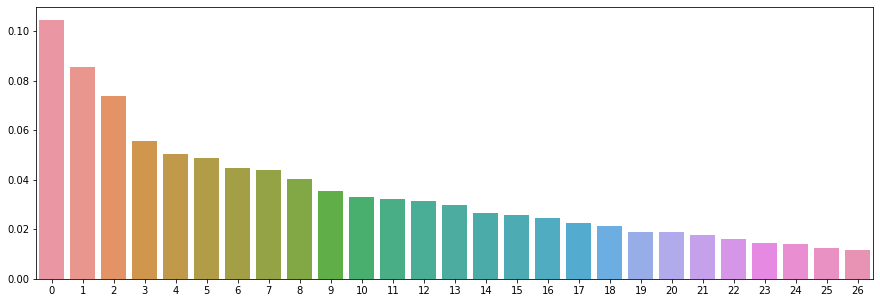

In [134]:
plt.figure(figsize=(15,5))
sns.barplot(x = list(range(len(pca_red.explained_variance_ratio_))), y = pca_red.explained_variance_ratio_)

In [135]:
pca_redcont = apc97(df_train_cnorm_redcont)

Varianza explicada: 0.9715089816972439
Nº de componentes: 32


In [136]:
PCA_features = [f'PCA{i}' for i in range(len(pca_redcont.explained_variance_ratio_)) ] 
df_train_apc_redcont = pd.DataFrame(pca_redcont.transform(df_train_cnorm_redcont), columns=PCA_features )
df_test_apc_redcont = pd.DataFrame(pca_redcont.transform(df_test_cnorm_redcont), columns=PCA_features )
df_train_apc_redcont.shape, df_test_apc_redcont.shape

((2189, 32), (548, 32))

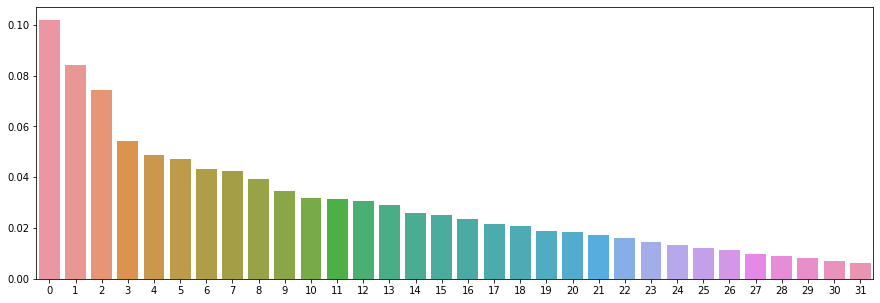

In [137]:
plt.figure(figsize=(15,5))
sns.barplot(x = list(range(len(pca_redcont.explained_variance_ratio_))), y = pca_redcont.explained_variance_ratio_)

# III Sampling
 input_train_df e input_test_df <br> => <br>
 samples_input : X_train_apc_reduced_tipodemuestreo, samples_output: y_train_apc_reduced_tipodemuestreo

In [138]:
input_train_dfs  = {'apc_reduced' : df_train_apc_red, 'apc_red_onlycont' : df_train_apc_redcont, 'woe_reduced' : df_train_woe_red, 'woe_red_w3132' : df_train_woe_red_w3132,
                    'woe_red_onlycont' : df_train_woe_redcont}

In [139]:
input_test_dfs  = {'apc_reduced' : df_test_apc_red, 'apc_red_onlycont' : df_test_apc_redcont, 'woe_reduced' : df_test_woe_red, 'woe_red_w3132' : df_test_woe_red_w3132,
                   'woe_red_onlycont' : df_test_woe_redcont}

In [140]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [141]:
rus = RandomUnderSampler(replacement=False)
ros = RandomOverSampler()
rSMOTE = SMOTE()
steps = [('s', rSMOTE),('u', rus)]
pipeline = Pipeline(steps=steps)

In [142]:
sampling = {
    'undersampling' : rus,
    'oversampling' : ros,
    'smote' : rSMOTE,
    'oplusu' : pipeline
}

In [143]:
samples_input = {}
samples_output = {}
for dfkey,dfvalue in input_train_dfs.items():
  for key,value in sampling.items():
    name_train_input = 'X_train_' + str(dfkey) + '_' + str(key) 
    name_train_output = 'y_train_' +  str(dfkey) + '_' + str(key)
    samples_input[name_train_input], samples_output[name_train_output] = value.fit_resample(dfvalue,df_train_label)
  

In [144]:
for key,values in samples_output.items():
  (unique,counts) = np.unique(values, return_counts=True)
  print(" Dimesiones del set {}:  {},Valores encontrados: {}, Cantidad de datos por valor: {}".format(key, values.shape , unique, counts))

 Dimesiones del set y_train_apc_reduced_undersampling:  (858, 1),Valores encontrados: [0. 1.], Cantidad de datos por valor: [429 429]
 Dimesiones del set y_train_apc_reduced_oversampling:  (3520, 1),Valores encontrados: [0. 1.], Cantidad de datos por valor: [1760 1760]
 Dimesiones del set y_train_apc_reduced_smote:  (3520, 1),Valores encontrados: [0. 1.], Cantidad de datos por valor: [1760 1760]
 Dimesiones del set y_train_apc_reduced_oplusu:  (3520, 1),Valores encontrados: [0. 1.], Cantidad de datos por valor: [1760 1760]
 Dimesiones del set y_train_apc_red_onlycont_undersampling:  (858, 1),Valores encontrados: [0. 1.], Cantidad de datos por valor: [429 429]
 Dimesiones del set y_train_apc_red_onlycont_oversampling:  (3520, 1),Valores encontrados: [0. 1.], Cantidad de datos por valor: [1760 1760]
 Dimesiones del set y_train_apc_red_onlycont_smote:  (3520, 1),Valores encontrados: [0. 1.], Cantidad de datos por valor: [1760 1760]
 Dimesiones del set y_train_apc_red_onlycont_oplusu:  (35

# IV Modeling

In [145]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [146]:
clf_params = {
      'class_weight' : ['balanced', '']
  }

In [147]:
for k,v in samples_input.items():
  for dfk1,dfv1 in input_test_dfs.items():
      if dfk1 in k:
        print(f'{k} == {dfk1} ; {v.shape} and  {dfv1.shape}')

X_train_apc_reduced_undersampling == apc_reduced ; (858, 27) and  (548, 27)
X_train_apc_reduced_oversampling == apc_reduced ; (3520, 27) and  (548, 27)
X_train_apc_reduced_smote == apc_reduced ; (3520, 27) and  (548, 27)
X_train_apc_reduced_oplusu == apc_reduced ; (3520, 27) and  (548, 27)
X_train_apc_red_onlycont_undersampling == apc_red_onlycont ; (858, 32) and  (548, 32)
X_train_apc_red_onlycont_oversampling == apc_red_onlycont ; (3520, 32) and  (548, 32)
X_train_apc_red_onlycont_smote == apc_red_onlycont ; (3520, 32) and  (548, 32)
X_train_apc_red_onlycont_oplusu == apc_red_onlycont ; (3520, 32) and  (548, 32)
X_train_woe_reduced_undersampling == woe_reduced ; (858, 45) and  (548, 45)
X_train_woe_reduced_oversampling == woe_reduced ; (3520, 45) and  (548, 45)
X_train_woe_reduced_smote == woe_reduced ; (3520, 45) and  (548, 45)
X_train_woe_reduced_oplusu == woe_reduced ; (3520, 45) and  (548, 45)
X_train_woe_red_w3132_undersampling == woe_red_w3132 ; (858, 43) and  (548, 43)
X_train

In [148]:
scores_train = {}
best_params = {}
scores_test = {}
f1_dict = {}
auc_dict = {}
matrix_dict = {}
probs_dict = {}
espec_dict = {} 
sensit_dict = {}
for i,((k1,v1),(k2,v2)) in enumerate(zip(samples_input.items(),samples_output.items())):

  print(f'*****{k1}*****')

  cvs = [10,15,20,25,30,40]
  for cv in cvs:

    clf = LogisticRegression(max_iter=150)
    grid_clf = GridSearchCV(clf,clf_params,cv=cv,scoring='recall', verbose=0)
    grid_clf.fit(v1,v2.values.ravel())

    scores_train['{}'.format('recall_'+k1[8:]+'_'+str(cv))] = grid_clf.best_score_
    best_params['{}'.format( 'bp_'+k1[8:]+'_'+str(cv))] = grid_clf.best_params_

    for dfk1,dfv1 in input_test_dfs.items():
      if dfk1 in k1:
        df_testing = dfv1
        #print(f'*****{dfk1}*****')

    grid_pred = grid_clf.predict(df_testing)
    scores_test['{}'.format('recall_'+k1[8:]+'_'+str(cv))] = metrics.recall_score(df_test_label,grid_pred)
    f1_dict['{}'.format('f1_'+k1[8:]+'_'+str(cv))] = metrics.f1_score(df_test_label,grid_pred)
    print('matriz de confusión '+k1[8:]+'_'+str(cv))
    print( metrics.confusion_matrix(df_test_label,grid_pred) )
    matrix_dict['{}'.format('matrix_'+k1[8:]+'_'+str(cv))] = metrics.confusion_matrix(df_test_label,grid_pred)
    print('===')

    probs = grid_clf.predict_proba(df_testing)
    probs_dict['{}'.format('probs_'+k1[8:]+'_'+str(cv))] = probs

    espec, sensit, _ = metrics.roc_curve(df_test_label,probs[:,1])
    espec_dict['{}'.format('espec_'+k1[8:]+'_'+str(cv))] = espec
    sensit_dict['{}'.format('sensit_'+k1[8:]+'_'+str(cv))] = sensit
    auc_dict['{}'.format('auc_'+k1[8:]+'_'+str(cv))] = metrics.auc(espec,sensit)

*****X_train_apc_reduced_undersampling*****
matriz de confusión apc_reduced_undersampling_10
[[362  78]
 [ 16  92]]
===
matriz de confusión apc_reduced_undersampling_15
[[362  78]
 [ 16  92]]
===
matriz de confusión apc_reduced_undersampling_20
[[362  78]
 [ 16  92]]
===
matriz de confusión apc_reduced_undersampling_25
[[362  78]
 [ 16  92]]
===
matriz de confusión apc_reduced_undersampling_30
[[362  78]
 [ 16  92]]
===
matriz de confusión apc_reduced_undersampling_40
[[362  78]
 [ 16  92]]
===
*****X_train_apc_reduced_oversampling*****
matriz de confusión apc_reduced_oversampling_10
[[367  73]
 [ 17  91]]
===
matriz de confusión apc_reduced_oversampling_15
[[367  73]
 [ 17  91]]
===
matriz de confusión apc_reduced_oversampling_20
[[367  73]
 [ 17  91]]
===
matriz de confusión apc_reduced_oversampling_25
[[367  73]
 [ 17  91]]
===
matriz de confusión apc_reduced_oversampling_30
[[367  73]
 [ 17  91]]
===
matriz de confusión apc_reduced_oversampling_40
[[367  73]
 [ 17  91]]
===
*****X_

In [149]:
sorted(scores_train.items(), key=lambda x: x[1], reverse=True)

[('recall_woe_red_onlycont_smote_40', 0.896590909090909),
 ('recall_woe_red_onlycont_smote_30', 0.8961620884473016),
 ('recall_woe_red_onlycont_smote_20', 0.8960227272727271),
 ('recall_woe_red_onlycont_oplusu_10', 0.8954545454545455),
 ('recall_woe_red_onlycont_smote_10', 0.8954545454545453),
 ('recall_woe_red_onlycont_smote_25', 0.8953802816901409),
 ('recall_woe_red_w3132_oplusu_30', 0.8953341126047145),
 ('recall_woe_red_w3132_oplusu_40', 0.8948863636363636),
 ('recall_woe_red_onlycont_smote_15', 0.8948138490511373),
 ('recall_woe_red_w3132_oplusu_20', 0.8943181818181818),
 ('recall_woe_red_onlycont_oplusu_20', 0.8943181818181818),
 ('recall_woe_red_onlycont_oplusu_15', 0.8942730213916655),
 ('recall_woe_red_onlycont_oplusu_25', 0.8931509054325955),
 ('recall_woe_red_onlycont_oplusu_40', 0.8926136363636363),
 ('recall_woe_red_onlycont_oplusu_30', 0.8921196181570232),
 ('recall_woe_red_w3132_oplusu_25', 0.8903822937625754),
 ('recall_woe_red_w3132_oplusu_15', 0.8898208508378),
 ('re

In [150]:
sorted(scores_test.items(), key=lambda x: x[1], reverse=True)

[('recall_woe_reduced_oversampling_10', 0.9166666666666666),
 ('recall_woe_reduced_oversampling_15', 0.9166666666666666),
 ('recall_woe_reduced_oversampling_20', 0.9166666666666666),
 ('recall_woe_reduced_oversampling_25', 0.9166666666666666),
 ('recall_woe_reduced_oversampling_30', 0.9166666666666666),
 ('recall_woe_reduced_oversampling_40', 0.9166666666666666),
 ('recall_woe_reduced_undersampling_10', 0.9074074074074074),
 ('recall_woe_reduced_undersampling_15', 0.9074074074074074),
 ('recall_woe_reduced_undersampling_20', 0.9074074074074074),
 ('recall_woe_reduced_undersampling_25', 0.9074074074074074),
 ('recall_woe_reduced_undersampling_30', 0.9074074074074074),
 ('recall_woe_reduced_undersampling_40', 0.9074074074074074),
 ('recall_woe_reduced_smote_10', 0.9074074074074074),
 ('recall_woe_reduced_smote_15', 0.9074074074074074),
 ('recall_woe_reduced_smote_20', 0.9074074074074074),
 ('recall_woe_reduced_smote_25', 0.9074074074074074),
 ('recall_woe_reduced_smote_30', 0.90740740740

In [151]:
sorted(f1_dict.items(), key=lambda x: x[1], reverse=True)

[('f1_woe_reduced_oplusu_10', 0.725925925925926),
 ('f1_woe_reduced_oplusu_15', 0.725925925925926),
 ('f1_woe_reduced_oplusu_20', 0.725925925925926),
 ('f1_woe_reduced_oplusu_25', 0.725925925925926),
 ('f1_woe_reduced_oplusu_30', 0.725925925925926),
 ('f1_woe_reduced_oplusu_40', 0.725925925925926),
 ('f1_woe_red_w3132_oplusu_10', 0.7224334600760457),
 ('f1_woe_red_w3132_oplusu_15', 0.7224334600760457),
 ('f1_woe_red_w3132_oplusu_20', 0.7224334600760457),
 ('f1_woe_red_w3132_oplusu_25', 0.7224334600760457),
 ('f1_woe_red_w3132_oplusu_30', 0.7224334600760457),
 ('f1_woe_red_w3132_oplusu_40', 0.7224334600760457),
 ('f1_woe_red_onlycont_oplusu_10', 0.7191011235955056),
 ('f1_woe_red_onlycont_oplusu_15', 0.7191011235955056),
 ('f1_woe_red_onlycont_oplusu_20', 0.7191011235955056),
 ('f1_woe_red_onlycont_oplusu_25', 0.7191011235955056),
 ('f1_woe_red_onlycont_oplusu_30', 0.7191011235955056),
 ('f1_woe_red_onlycont_oplusu_40', 0.7191011235955056),
 ('f1_woe_reduced_smote_10', 0.717948717948718

In [152]:
sorted(auc_dict.items(), key=lambda x: x[1], reverse=True)

[('auc_woe_red_onlycont_oversampling_10', 0.9430660774410774),
 ('auc_woe_red_onlycont_oversampling_15', 0.9430660774410774),
 ('auc_woe_red_onlycont_oversampling_20', 0.9430660774410774),
 ('auc_woe_red_onlycont_oversampling_25', 0.9430660774410774),
 ('auc_woe_red_onlycont_oversampling_30', 0.9430660774410774),
 ('auc_woe_red_onlycont_oversampling_40', 0.9430660774410774),
 ('auc_woe_reduced_oversampling_10', 0.938415404040404),
 ('auc_woe_reduced_oversampling_15', 0.938415404040404),
 ('auc_woe_reduced_oversampling_20', 0.938415404040404),
 ('auc_woe_reduced_oversampling_25', 0.938415404040404),
 ('auc_woe_reduced_oversampling_30', 0.938415404040404),
 ('auc_woe_reduced_oversampling_40', 0.938415404040404),
 ('auc_woe_red_onlycont_undersampling_10', 0.93822601010101),
 ('auc_woe_red_onlycont_undersampling_15', 0.93822601010101),
 ('auc_woe_red_onlycont_undersampling_20', 0.93822601010101),
 ('auc_woe_red_onlycont_undersampling_25', 0.93822601010101),
 ('auc_woe_red_onlycont_undersam

In [153]:
best_params.items()

dict_items([('bp_apc_reduced_undersampling_10', {'class_weight': 'balanced'}), ('bp_apc_reduced_undersampling_15', {'class_weight': 'balanced'}), ('bp_apc_reduced_undersampling_20', {'class_weight': 'balanced'}), ('bp_apc_reduced_undersampling_25', {'class_weight': 'balanced'}), ('bp_apc_reduced_undersampling_30', {'class_weight': 'balanced'}), ('bp_apc_reduced_undersampling_40', {'class_weight': 'balanced'}), ('bp_apc_reduced_oversampling_10', {'class_weight': 'balanced'}), ('bp_apc_reduced_oversampling_15', {'class_weight': 'balanced'}), ('bp_apc_reduced_oversampling_20', {'class_weight': 'balanced'}), ('bp_apc_reduced_oversampling_25', {'class_weight': 'balanced'}), ('bp_apc_reduced_oversampling_30', {'class_weight': ''}), ('bp_apc_reduced_oversampling_40', {'class_weight': 'balanced'}), ('bp_apc_reduced_smote_10', {'class_weight': 'balanced'}), ('bp_apc_reduced_smote_15', {'class_weight': 'balanced'}), ('bp_apc_reduced_smote_20', {'class_weight': 'balanced'}), ('bp_apc_reduced_smot

In [154]:
print(matrix_dict['matrix_woe_reduced_undersampling_10'])
print('='*5)
print(matrix_dict['matrix_woe_red_onlycont_oversampling_10'])
print('='*5)
print(matrix_dict['matrix_woe_red_w3132_oversampling_10'])

[[356  84]
 [ 10  98]]
=====
[[370  70]
 [ 11  97]]
=====
[[366  74]
 [ 11  97]]


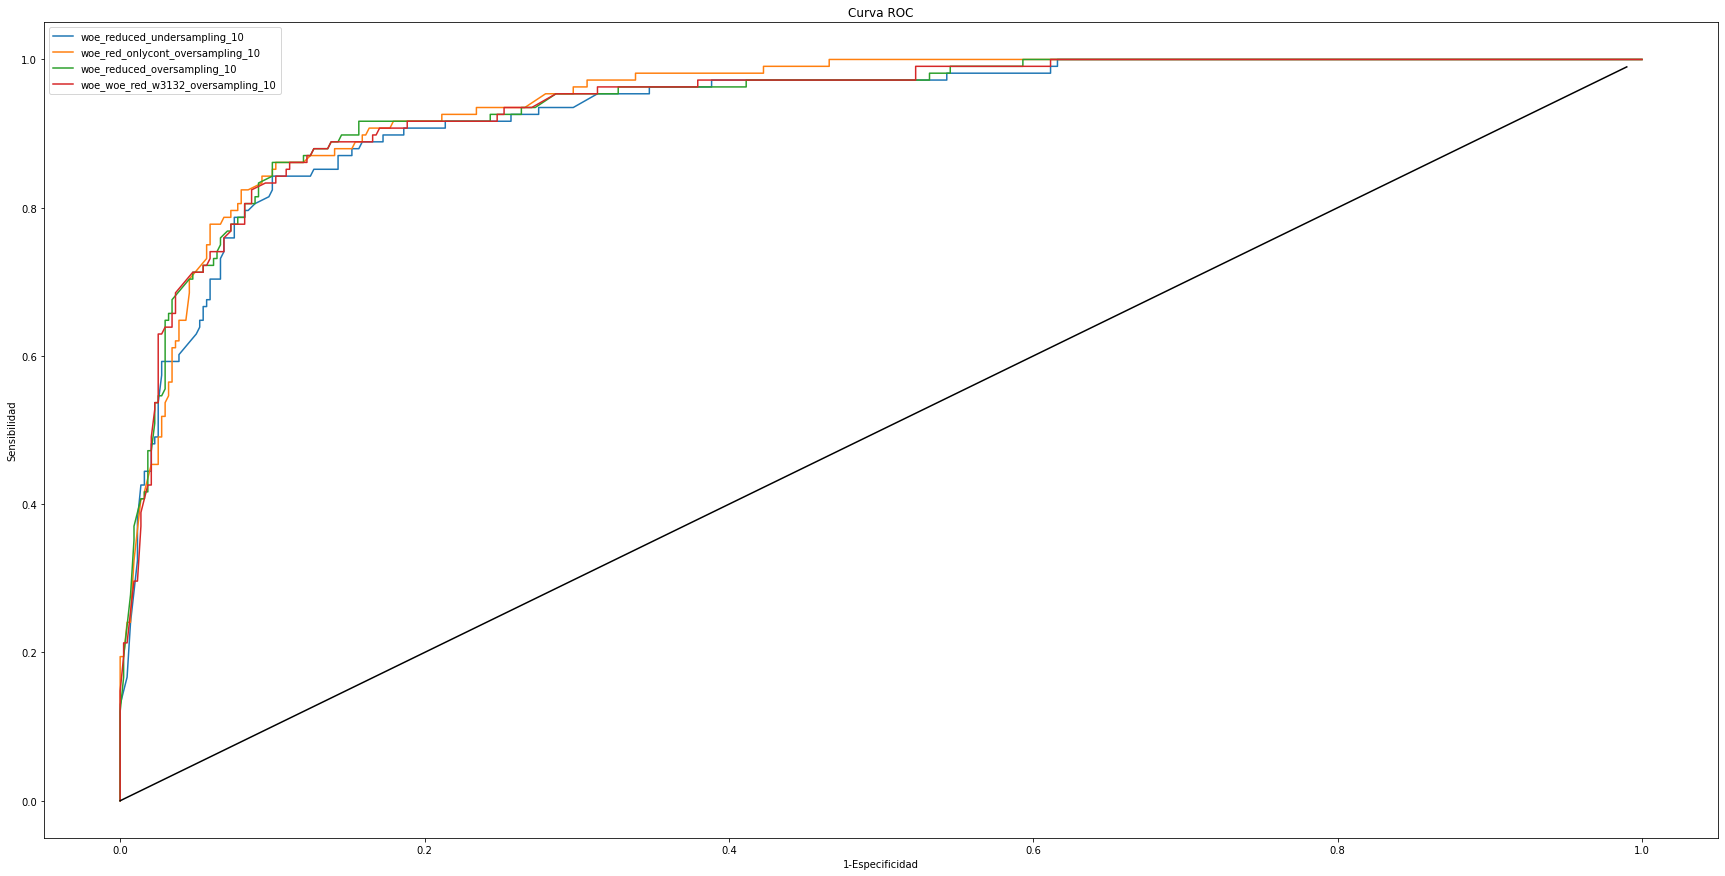

=====
woe_reduced_undersampling_10:  0.9311342592592593
=====
woe_red_onlycont_oversampling_10:  0.9430660774410774
=====
woe_reduced_oversampling_10:  0.938415404040404
=====
woe_red_w3132_oversampling_10:  0.9379945286195287


In [155]:
%matplotlib inline
plt.figure(figsize = (30,15))
x = [i * 0.01 for i in range(100)]
y = [i * 0.01 for i in range(100)]


plt.plot(espec_dict['espec_woe_reduced_undersampling_10'],sensit_dict['sensit_woe_reduced_undersampling_10'], label='woe_reduced_undersampling_10' )
plt.plot(espec_dict['espec_woe_red_onlycont_oversampling_10'],sensit_dict['sensit_woe_red_onlycont_oversampling_10'], label='woe_red_onlycont_oversampling_10')
plt.plot(espec_dict['espec_woe_reduced_oversampling_10'],sensit_dict['sensit_woe_reduced_oversampling_10'], label='woe_reduced_oversampling_10' )
plt.plot(espec_dict['espec_woe_red_w3132_oversampling_10'],sensit_dict['sensit_woe_red_w3132_oversampling_10'], label='woe_woe_red_w3132_oversampling_10' )

plt.plot(x,y, color='k')
plt.xlabel('1-Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')
plt.legend()
plt.show()
print('='*5)
print('woe_reduced_undersampling_10: ',auc_dict['auc_woe_reduced_undersampling_10'])
print('='*5)
print('woe_red_onlycont_oversampling_10: ',auc_dict['auc_woe_red_onlycont_oversampling_10'])
print('='*5)
print('woe_reduced_oversampling_10: ',auc_dict['auc_woe_reduced_oversampling_10'])
print('='*5)
print('woe_red_w3132_oversampling_10: ',auc_dict['auc_woe_red_w3132_oversampling_10'])

# V "Best model parameters"

In [219]:
clf = LogisticRegression(**best_params['bp_woe_reduced_oversampling_40'])
clf.fit(samples_input['X_train_woe_reduced_oversampling'],samples_output['y_train_woe_reduced_oversampling'].values.ravel())

LogisticRegression(class_weight='balanced')

In [220]:
predictions = clf.predict(input_test_dfs['woe_reduced'])

In [221]:
from sklearn.metrics import ConfusionMatrixDisplay

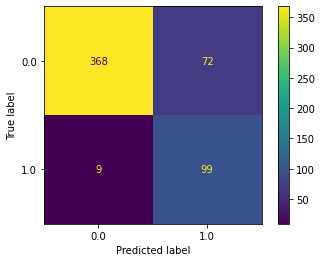

In [222]:
cm = metrics.confusion_matrix(df_test_label,predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [223]:
coefs = pd.DataFrame(list(zip(samples_input['X_train_woe_reduced_oversampling'].columns,list(clf.coef_[0]))))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 <a list of 45 Text major ticklabel objects>)

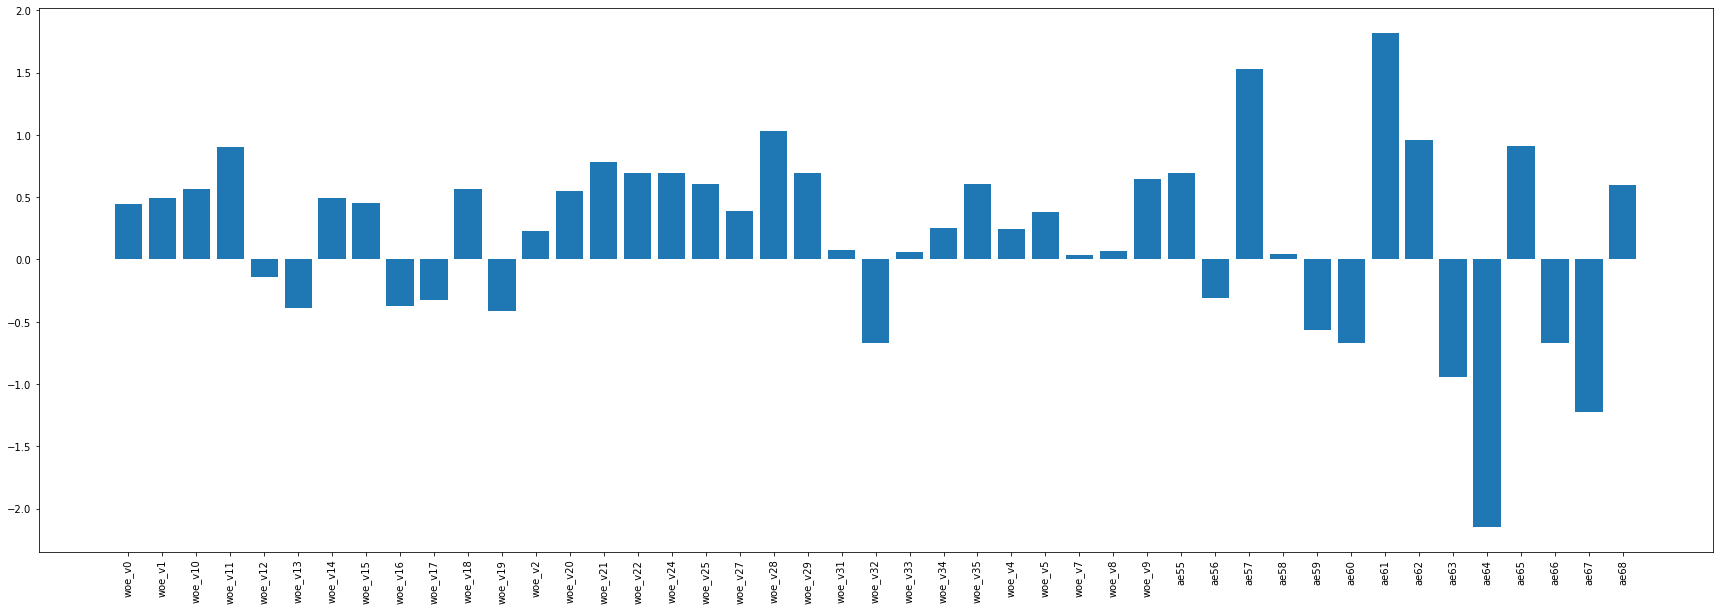

In [224]:
plt.figure(figsize = (30,10))
plt.bar(coefs[0],coefs[1])
plt.xticks(rotation=90)